In [3]:
%pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
import xlrd
import sklearn
import math
import os
import re
import copy
# from numba import njit
# from numba import jit

# from numba import prange
# import plotly
from datetime import date


# plotly.offline.init_notebook_mode(connected=True)
# import plotly.graph_objects as go
from time import time
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn.model_selection import ShuffleSplit
from datetime import datetime


from os import listdir
from os.path import isfile, join
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

import tqdm
from tqdm import tqdm, trange
import multiprocessing as mp
import time
import sys
np.set_printoptions(threshold=1000)

In [5]:
# %pip install jupyter_http_over_ws
# !jupyter serverextension enable --py jupyter_http_over_ws
# import jupyter_http_over_ws
# %env COLAB_WS_TIMEOUT_SEC=143200
import os
# print(os.environ.get('COLAB_WS_TIMEOUT_SEC'))

In [6]:
##########################
# SAVE-LOAD using pickle #
##########################
# !pip install varname
import pickle
# from varname import nameof


# save
def saver(model, model_name):
    with open(path_import + '/' + model_name + '.pkl','wb') as f:
        pickle.dump(model, f)
        print('saved in ' + str(f.name))

# load
def opener(model_name):
    name = str(model_name)
    name = path_import + '/' + name + '.pkl'
    print(name)
    with open(name, 'rb') as f:
        model = pickle.load(f)
    return model

Функция подсчета среднего значения в списке

In [7]:
def average_in_list(list):
    """
    Функция подсчета среднего значения в списке
    param: list -- список для поиска среднего

    return summ / len(list) -- среднее значения в списке
    """
    summ = 0
    for i in list:
        summ += i
    return summ / len(list)

Функция для считывания данных из отчетных файлов ПО Abaqus

In [8]:
def read_data_txt_np(name_of_file, example_dir):
    """
    Функция для считывания данных из отчетных файлов ПО Abaqus
    params:
    name_of_file -- имя файла
    example_dir -- директория файла

    return:
    data -- считанные данные
    """
    data_flag = 0
    content = os.listdir(example_dir)
    if os.path.isfile(os.path.join(example_dir, name_of_file)):
        if name_of_file in content:
            file = os.path.join(example_dir, name_of_file)
            if file.endswith('.txt'):
                # data = np.loadtxt(file, dtype='double', skiprows=56) #thermal
                data = np.loadtxt(file, dtype='double', skiprows=44) #isothermal
                data_flag = 1
            else:
                print(f'{file} doesnt ends with .txt')
        else:
            print(f"No file {name_of_file} in such dir")
    else:
        print(f"No such file {name_of_file}")
        return -1
    return data

In [9]:
def files_list(list_one, dir_):
    """
    Функция для считывания данных для переданого списка
    params:
    list_one -- список файлов
    dir_ -- директория файлов

    return:
    list_files -- список считанных данных
    """
    list_files = []
    for i in range(0, len(list_one)):
        file = read_data_txt_np(list_one[i], dir_)
        list_files.append(file)

    return list_files

In [10]:
def median_np(x):
    """ Построение медианы по переданному списку """
    return np.median(x)

In [11]:
def preprocessing_res_np(file):
    """
    Создание np.array по репорту
    params:
    file -- считааные из `read_data_txt_np` данные

    return:
    x_1_    -- массив х координат узлов решетки
    y_1_    -- массив у координат узлов решетки
    Stress  -- массив массивов компонент тензора напряжений и интенсивностей напряжений
    Strain  -- массив массивов компонент тензора деформаций и интенсивностей деформаций
    """
    x_1 = (file[::, 1]) * 10 ** 3
    y_1 = (file[::, 2]) * 10 ** 3

    eps_11_name = file[::, 11]
    eps_22_name = file[::, 12]
    eps_33_name = file[::, 13]
    eps_12_name = file[::, 14]

    stress_11_name = (file[::, 3]) / 10 ** 6
    stress_22_name = (file[::, 4]) / 10 ** 6
    stress_33_name = (file[::, 5]) / 10 ** 6
    stress_12_name = (file[::, 6]) / 10 ** 6

    #nt11_name = (file[::,15])
    #temp_name = (file[::,16])

    index = 0

    x_1_ = np.zeros((1, 1))
    y_1_ = np.zeros((1, 1))
    Strain = np.zeros((1, 5))
    Stress = np.zeros((1, 5))
    #NT11 = np.zeros((1, 1))
    #TEMP = np.zeros((1, 1))
    #ind_ = np.zeros((1,1))
    for j in range(0, np.shape(y_1)[0]):
        if y_1[j] >= 0.25 * (np.max(y_1) - np.min(y_1)) and y_1[j] <= 0.75 * (np.max(y_1) - np.min(y_1)):
            x_1_[index] = x_1[j]
            y_1_[index] = y_1[j]
            #ind_[index] = j

            Stress[index, 0] = stress_11_name[j]
            Stress[index, 1] = stress_22_name[j]
            Stress[index, 2] = stress_33_name[j]
            Stress[index, 3] = stress_12_name[j]
            Stress[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (stress_11_name[j] - stress_22_name[j]) ** 2 + (stress_22_name[j] - stress_33_name[j]) ** 2 + (
                        stress_33_name[j] - stress_11_name[j]) ** 2 + 6 * (stress_12_name[j] ** 2))

            Strain[index, 0] = eps_11_name[j]
            Strain[index, 1] = eps_22_name[j]
            Strain[index, 2] = eps_33_name[j]
            Strain[index, 3] = eps_12_name[j]
            Strain[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (eps_11_name[j] - eps_22_name[j]) ** 2 + (eps_22_name[j] - eps_33_name[j]) ** 2 + (
                        eps_33_name[j] - eps_11_name[j]) ** 2 + 6 * (eps_12_name[j] ** 2))

            #NT11[index]=nt11_name[j]
            #TEMP[index]=temp_name[j]

            x_1_ = np.concatenate((x_1_, np.zeros((1, 1))))
            y_1_ = np.concatenate((y_1_, np.zeros((1, 1))))
            Stress = np.concatenate((Stress, np.zeros((1, 5))))
            Strain = np.concatenate((Strain, np.zeros((1, 5))))
            #NT11 = np.concatenate((NT11,np.zeros((1,1))))
            #TEMP = np.concatenate((TEMP,np.zeros((1,1))))
            index = index + 1

    x_1_ = np.delete(x_1_, -1)
    y_1_ = np.delete(y_1_, -1)
    Stress = np.delete(Stress, -1, axis=0)
    Strain = np.delete(Strain, -1, axis=0)

    x_1_, characteristics = sorter(x_1_, [y_1_, Stress, Strain])
    y_1_, Stress, Strain = characteristics[0], characteristics[1], characteristics[2]

    return x_1_, y_1_, Stress, Strain

In [12]:
def average_val_np(array_1, nodes=13):
    """ Построение осредненных распределений """
    b = np.zeros((nodes))
    for i in range(0, nodes):
        b[i] = np.median(np.array_split(array_1, nodes)[i])

    return b

In [13]:
def get_param(cur_job_name, vel20List, all20Arrays, char_1=2, char_2=4):
    """
    Функция для извлечения зависимых и независимых переменных для 1 расчета
    params:
    cur_job_name -- название расчетного файла до точки
    vel20List -- список всех имен расчетных файов
    all20Arrays -- список предобработанных данных
    char_1 -- индекс характеристики (2-напряжения, 3-деформации)
    char_2 -- индекс компоненты тензора, 4 - интенсивность

    return:
    [red, cal, ha, vel, fric, char] -- список требуемых характеристик
    (обжатие, коэффициент калибровочного участка, полуугол волоки, скорость, трение и искомая характеристика соотвественно)
    """
    int_res_stress_idx = vel20List.index(cur_job_name)

    char = average_val_np(all20Arrays[int_res_stress_idx][char_1][::, char_2], 20)

    red = r(cur_job_name)
    cal = c(cur_job_name)
    ha = h(cur_job_name)
    vel = v(cur_job_name)
    fric = f(cur_job_name)

    return [red, cal, ha, vel, fric, char]

In [14]:
def sorter(xx, heap_of_stresses):
    """
    Сортирует по возрастанию узлы по значению расстояния от оси проволоки и
        перегруппировывает значения в остальных массивах в соответствии с новыми
        значениями индексов, но больше не удаляет точку (0,0)
    :param xx: значения координат х
    :param heap_of_stresses: список характеристик
    :return: x_sorted, heap_of_stresses_sorted
    """

    heap_of_stresses_sorted = heap_of_stresses[:]
    ai = np.argsort(xx, axis=0)
    x_sorted = np.take_along_axis(xx, ai, axis=0)
    ai = ai.flatten()

    for idx, i in enumerate(heap_of_stresses):
        ai_i = np.copy(ai)
        if i.ndim > 1:    # alternatively use np.tile instead
            for j in range(i.shape[1]-1):
                ai_i = np.vstack((ai_i, ai))
            ai_i = ai_i.T
        heap_of_stresses_sorted[idx] = np.take_along_axis(i, ai_i, axis=0)
        # heap_of_stresses_sorted[idx] = np.delete(heap_of_stresses_sorted[idx], delete_idx)

    return x_sorted, heap_of_stresses_sorted

In [15]:
def r(job_name):
    """
    Ищет обжатие по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'red':
            found = splitted_job[i+1]
    reduct = float(found) / 10000
    return reduct

def c(job_name):
    """
    Ищет коэффициент калибровочного участка по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'cal':
            found = splitted_job[i+1]
    cali = float(found) / 100
    return cali


def f(job_name):
    """
    Ищет к-т трения по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'fric':
            found = splitted_job[i+1][1:]
    fr = float(found) / 1000
    return fr

def v(job_name):
    """
    Ищет скорость по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'vel':
            found = splitted_job[i+1]
    velo = int(found)
    return velo

def h(job_name):
    """
    Ищет полуугол по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == '2a':
            found = splitted_job[i+1]
    ha = int(found) / 2
    return ha

In [16]:
# @title Функция для подсчета максимальной ошибки для графиков
def max_er(pred, ground_true):

    maxerror = 0
    for i in range(0, len(pred)):
        cmape = (ground_true[i] - pred[i]) / ground_true[i] *100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [17]:
# @title Функция для подсчета максимальной средней ошибки для графиков
def max_graph_er(pred, ground_true):

    maxerror = 0
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [18]:
# @title Функция для подсчета медианной средней ошибки для графиков
def med_graph_er(pred, ground_true):

    mapes = np.zeros((len(pred)//20))
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        mapes[i] = cmape
    med = min(mapes, key=lambda x:abs(x-np.median(mapes)))
    return med

In [19]:
# @title Функция для подсчета минимальной средней ошибки для графиков
def min_graph_er(pred, ground_true):

    minerror = 1e10
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        minerror = cmape if cmape < minerror else minerror

    return minerror

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
def do_rep_list(path_import):
    rep_list = [fil[:-4] for fil in listdir(path_import)
                if isfile(join(path_import, fil)) and fil.endswith('.txt')]
    return rep_list

In [25]:
path_import_2_30 = 'Vel_2_30/'
path_import_5 = 'Vel_5/'
path_import_10 = 'Vel_10/'
path_import_20 = 'Vel_20/'
path_import_40 = 'Vel_40/'


rep_list_2_30 = do_rep_list(path_import_2_30)
rep_list_5 = do_rep_list(path_import_5)
rep_list_10 = do_rep_list(path_import_10)
rep_list_20 = do_rep_list(path_import_20)
rep_list_40 = do_rep_list(path_import_40)


In [26]:
path_import = '720'
# path_import = 'Data_set_eps_dot/Vel_2_30/'


# rep_list = [fil[:-4] for fil in listdir(path_import)
#             if isfile(join(path_import, fil)) and fil.endswith('.txt')]

## Построение vel20List

In [27]:
"""vel20List = [fil for fil in rep_list
             if 'vel_20' in fil
                and '(' not in fil
                and fil not in ['zeides_2a_28_red_1000_cal_30_vel_20',
                                'zeides_2a_32_red_1800_cal_50_vel_30']]"""

"vel20List = [fil for fil in rep_list\n             if 'vel_20' in fil\n                and '(' not in fil\n                and fil not in ['zeides_2a_28_red_1000_cal_30_vel_20',\n                                'zeides_2a_32_red_1800_cal_50_vel_30']]"

In [28]:
"""test_other = [
    'zeides_2a_44_red_1900_cal_125_vel_20_fric_080',
    'zeides_2a_28_red_1900_cal_90_vel_20_fric_075',
    'zeides_2a_36_red_1900_cal_40_vel_20_fric_075',
    'zeides_2a_28_red_1900_cal_40_vel_20_fric_075',
    'zeides_2a_28_red_1700_cal_40_vel_20_fric_075'
]"""

"test_other = [\n    'zeides_2a_44_red_1900_cal_125_vel_20_fric_080',\n    'zeides_2a_28_red_1900_cal_90_vel_20_fric_075',\n    'zeides_2a_36_red_1900_cal_40_vel_20_fric_075',\n    'zeides_2a_28_red_1900_cal_40_vel_20_fric_075',\n    'zeides_2a_28_red_1700_cal_40_vel_20_fric_075'\n]"

Препроцессинг имеющихся данных

In [29]:
def do_preprocessing(list_names, path_import=path_import):
    vel20ListFiles = []
    for fi in list_names:
        vel20ListFiles.append(fi + '.txt')
    la = files_list(vel20ListFiles, path_import)
    all20Arrays = []
    for fl in la:
        all20Arrays.append(preprocessing_res_np(fl))
        print('.', end='')
    print('')
    return all20Arrays

In [ ]:
arrays_2_30 = do_preprocessing(rep_list_2_30, path_import_2_30)
arrays_5 = do_preprocessing(rep_list_5, path_import_5)
arrays_10 = do_preprocessing(rep_list_10, path_import_10)
arrays_20 = do_preprocessing(rep_list_20, path_import_20)
arrays_40 = do_preprocessing(rep_list_40, path_import_40)

..............................................................................................................................................................
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
..................................................................................................................................................................................................................

In [29]:
arrays_2_30.shape, arrays_5.shape, arrays_10.shape, arrays_20.shape, arrays_40.shape

(158, 630, 630, 630, 630)

In [ ]:
"""vel20ListFiles = []
for fi in vel20List:
    vel20ListFiles.append(fi + '.txt')
la = files_list(vel20ListFiles, path_import)
all20Arrays = []
for fl in la:
    all20Arrays.append(preprocessing_res_np(fl))
    print('.', end='')"""

In [ ]:
"""path_import_val = '/content/drive/Shareddrives/project_1740/val/'
testListFiles = []
for fi in test_other:
    testListFiles.append(fi + '.txt')
la = files_list(testListFiles, path_import_val)
test_otherArrays = []
for fl in la:
    test_otherArrays.append(preprocessing_res_np(fl))
    print('.', end='')"""

In [ ]:
"""train_list = [fil for fil in vel20List if 'red_3000' not in fil]
print(len(train_list))
train_listFiles = []
for fi in train_list:
    train_listFiles.append(fi + '.txt')
la = files_list(train_listFiles, path_import)
train_arrays = []
for fl in la:
    train_arrays.append(preprocessing_res_np(fl))
    print('.', end='')"""

# ВАЛИДАЦИОННЫЙ ДАТАСЕТ ИЗ ЦЕЛОГО ГРАФИКА

Составление датасетов для предсказания напряжений и деформаций

в каждом массиве теперь лежат значения инпутов или таргетов для всех трех компонент тензора

In [ ]:
def data_preparer(train_list, train_arrays):
    """
    Преобразует массивы из preprocessing_np
    в массивы для разделения на трейн и тест.

    Выделяет компоненты тензора в таргет и параметры процесса в инпут.

    """
    X_stress_components = []
    X_strain_components = []
    X_components = [X_stress_components, X_strain_components]


    y_stress_components = []
    y_strain_components = []
    y_components = [y_stress_components, y_strain_components]

    for char in range(2):
        for comp in range(3):
            X = np.zeros((len(train_list), 5))
            y = np.zeros((len(train_list), 20))

            for i, job_name in enumerate(train_list):
                red, cal, ha, vel, fric, value = get_param(job_name,
                                                            train_list,
                                                            train_arrays,
                                                            char_1 = 2 + char,
                                                            char_2 = comp
                                                            )

                X[i] = np.array([red, cal, ha, fric, vel])
                y[i] = value
            X_components[char].append(X)
            y_components[char].append(y)

    X_stress_components = np.array(X_stress_components)
    X_strain_components = np.array(X_strain_components)

    y_stress_components = np.array(y_stress_components)
    y_strain_components = np.array(y_strain_components)

    return X_stress_components, X_strain_components,\
           y_stress_components, y_strain_components


In [ ]:
"""X_stress_components_new, X_strain_components_new, y_stress_components_new,\
y_strain_components_new = data_preparer(rep_list_2_30+rep_list_5+
                                    rep_list_10+rep_list_20,
                                    arrays_2_30+arrays_5+arrays_10+arrays_20)

saver(X_stress_components_new, 'X_stress_components_new')
saver(X_strain_components_new, 'X_strain_components_new')

saver(y_stress_components_new, 'y_stress_components_new')
saver(y_strain_components_new, 'y_strain_components_new')"""

In [ ]:
X_stress_components_new = opener('X_stress_components_new')
X_strain_components_new = opener('X_strain_components_new')
y_stress_components_new = opener('y_stress_components_new')
y_strain_components_new = opener('y_strain_components_new')

## Поиск выбросов

In [ ]:
y_stress_components_new.shape

In [ ]:
y_stress_components_new[0][0]

In [ ]:
def plot_result_stress_avr_v(list_files, labels, name, **kwargs):
    """Строит графики для минимальных, максимальных и средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18, 10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))

    # preped_arrays = [preprocessing_res_np(item) for item in list_files]
    preped_arrays = list_files

    for i in range(0, len(list_files)):

        x_1 = average_val_np(preped_arrays[i][0])
        R1 = x_1.max()

        for j in range(1, 4):
            plt.subplot(1, 3, j)
            # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)

            avr_strain = average_val_np(preped_arrays[i][2][::, j - 1])
            #             min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
            #             max_strain =  max_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])

            plt.plot(x_1 / R1, avr_strain, markersize=9, label=labels[i])
            #             plt.plot(x_1/R1, min_strain, '-*', markersize=9, color = colours_[i])
            #             plt.plot(x_1/R1, max_strain, '-.', markersize=9, color = colours_[i])

            if (j == 1):
                plt.ylabel('$ \sigma_{r}$, -', fontsize=20,)

            elif (j == 2):
                plt.ylabel('$ \sigma_{z}$, -', fontsize=20,)

            elif (j == 3):
                plt.ylabel('$ \sigma_{\phi}$, -', fontsize=20,)

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22)

            plt.xlim(0, 1.01)
            plt.tick_params(axis='x', length=5, labelsize=10, zorder=15)
            plt.tick_params(axis='y', length=5, labelsize=10, zorder=15)
            plt.xticks(np.arange(0, 1.02, 0.2))

            plt.xlabel(' r, -', fontsize=20,)
            #plt.grid(True)

    if kwargs.get('to_plot_legend', False): plt.legend(loc='best')
    to_save = kwargs.get('to_save', False)
    to_show = kwargs.get('to_show', True)
    plt.subplots_adjust(wspace=0.333, hspace=0)
    dpi = kwargs.get('dpi', 600)
    if to_save: plt.savefig(name + 'avr_stress_v_' + '.png', dpi=dpi)
    if to_show: plt.show()

In [ ]:
!ls drive/Shareddrives/project_1740/Data_set_eps_dot

In [ ]:
!ls

In [ ]:
Data_set_eps_dot_outlier_path =\
    'drive/Shareddrives/project_1740/Data_set_eps_dot/outlier_pics'
saving_plot_cell = False
if saving_plot_cell:
    # os.mkdir(Data_set_eps_dot_outlier_path)

    list_arrays = arrays_2_30+arrays_5+arrays_10+arrays_20
    list_files = rep_list_2_30+rep_list_5+rep_list_10+rep_list_20
    for i_pic in range(len(list_arrays) // 50):
        i_pic *= 50
        i_pic_next = i_pic + 50
        plot_result_stress_avr_v(
            list_arrays[i_pic:i_pic_next],
            list_files[i_pic:i_pic_next],
            Data_set_eps_dot_outlier_path+f'/vel20List[{i_pic}:{i_pic_next}]',
            to_save=True,
            to_show=False
        )

In [ ]:
X_stress_components_new[0].min(axis=0), X_stress_components_new[0].max(axis=0)

(array([0.015, 0.   , 4.   , 0.025, 1.   ]),
 array([ 0.25,  1.  , 20.  ,  0.1 , 30.  ]))

In [ ]:
list_arrays = arrays_2_30+arrays_5+arrays_10+arrays_20
list_files = rep_list_2_30+rep_list_5+rep_list_10+rep_list_20

i_pic = -51-3
i_pic_next = -38
step = 3
bad_set = set(np.arange(i_pic+len(list_arrays), i_pic_next+len(list_arrays), step))

plot_result_stress_avr_v(
        list_arrays[i_pic:i_pic_next:step],
        list_files[i_pic:i_pic_next:step],
        Data_set_eps_dot_outlier_path+f'/vel20List[{i_pic}:{i_pic_next}:{step}]',
        to_save=True,
        to_plot_legend=True
    )

In [ ]:
np.arange(i_pic+len(list_arrays), i_pic_next+len(list_arrays), step)

array([1994, 1997, 2000, 2003, 2006, 2009])

In [ ]:
a = np.array(list_files)
red_lines = ['zeides_2a_8_red_2000_cal_10_vel_10_fric_025',
'zeides_2a_8_red_2000_cal_75_vel_10_fric_050',
'zeides_2a_8_red_2500_cal_30_vel_10_fric_0100',
'zeides_2a_8_red_250_cal_0_vel_10_fric_025',
'zeides_2a_8_red_2000_cal_30_vel_10_fric_050']
red_indices = np.where(np.isin(a, red_lines))[0]
red_arrays = [list_arrays[it] for it in red_indices]
# [it for it in red_indices]

In [ ]:

plot_result_stress_avr_v(
    red_arrays,
    red_lines,
    Data_set_eps_dot_outlier_path+f'/vel20List[{i_pic}:{i_pic_next}]',
    to_save=False,
    to_show=1,
    to_plot_legend=True,
    dpi=50
)

In [ ]:

def skip_bad_calcs(list_arrays, a, b):
    base_set = set(np.arange(a, b))
    to_plot_set = base_set - bad_set
    out = [list_arrays[item] for item in to_plot_set]
    print(len(out))
    return out

no_outliers_plot_cell = 1
if no_outliers_plot_cell:
    # os.mkdir(Data_set_eps_dot_outlier_path)

    list_arrays = arrays_2_30+arrays_5+arrays_10+arrays_20
    list_files = rep_list_2_30+rep_list_5+rep_list_10+rep_list_20
    for i_pic in range(749//50, len(list_arrays) // 50):
        i_pic *= 50
        i_pic_next = i_pic + 50

        plot_result_stress_avr_v(
            skip_bad_calcs(list_arrays, i_pic, i_pic_next),
            skip_bad_calcs(list_files, i_pic, i_pic_next),
            Data_set_eps_dot_outlier_path+f'/vel20List[{i_pic}:{i_pic_next}]',
            to_save=False,
            to_show=1,
            to_plot_legend=True,
            dpi=50
        )

Output hidden; open in https://colab.research.google.com to view.

# ToDo

- корреляция
- сравнение между скоростями
- сравнение с предыдущим датасетом

In [ ]:

def flatten_r(X_train_fair, y_train_fair):
    # ic(y_train_fair.shape)
    X_1 = np.zeros((len(X_train_fair)*20, X_train_fair.shape[1]+1))
    y_1 = np.zeros((len(X_train_fair)*20, ))
    for i in range(len(X_train_fair)):
        for j in range(20):
            X_1[i*20+j] = np.hstack((X_train_fair[i], j/19))
            y_1[i*20+j] = y_train_fair[i][j]
    return X_1, y_1

In [ ]:
# flatten_r(X_stress_components[0], y_stress_components[0])

In [ ]:
def split_transform(X, y):
    splitted_X, splitted_y = [], []
    for comp in range(3):
        cur_X, cur_y = X[comp], y[comp]
        cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
         train_test_split(cur_X, cur_y, train_size=.7, random_state=50)
        cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
        cur_X_val, cur_X_test, cur_y_val, cur_y_test =\
         train_test_split(cur_X_test, cur_y_test,
                          train_size=.5, random_state=50)
        cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
        cur_X_val, cur_y_val = flatten_r(cur_X_val, cur_y_val)
        splitted_X.append([cur_X_train, cur_X_val, cur_X_test])
        splitted_y.append([cur_y_train, cur_y_val, cur_y_test])
    return splitted_X, splitted_y

In [ ]:
def split_transform_one_comp(X, y):
    splitted_X, splitted_y = [], []
    cur_X, cur_y = X, y
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
     train_test_split(cur_X, cur_y, train_size=.7, random_state=50)
    cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
    cur_X_val, cur_X_test, cur_y_val, cur_y_test =\
     train_test_split(cur_X_test, cur_y_test, train_size=.5, random_state=50)
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
    cur_X_val, cur_y_val = flatten_r(cur_X_val, cur_y_val)
    splitted_X.append([cur_X_train, cur_X_val, cur_X_test])
    splitted_y.append([cur_y_train, cur_y_val, cur_y_test])
    return splitted_X[0], splitted_y[0]

In [ ]:
def split_transform_one_comp_train_test(X, y):
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
    train_test_split(X, y, train_size=.7, random_state=50)
    cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)

    return cur_X_train, cur_X_test, cur_y_train, cur_y_test

Хочу записывать метрики в датафрейм и потом объединить датафреймы из всех блокнотов.

                     df
    characteristics of ANN              metrics values
    _____________________________________________________
    n_layers                                MAPE (???)
    n_neurons                               MMAPE (???)
    optim                                   AIC
    max_epochs                              R^2
    ///                                     other

In [ ]:
df_results = pd.DataFrame(
    columns=[
            # Constructional
             'n_layers', 'n_neurons', 'solver', 'max_iter',
             'learning_rate_init', 'learning_rate', 'early_stopping',
             'activation', 'n_splits', 'alpha',

            # Resultant _val
             'explained_variance_score_val', 'median_absolute_error_val',
             'mean_squared_error_val', 'mean_absolute_error_val',
             'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
             'explained_variance_score_test', 'median_absolute_error_test',
             'mean_squared_error_test', 'mean_absolute_error_test',
             'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]
    )

In [ ]:

def scorer(y_true, y_pred, pipeline, X_train):
    evs = explained_variance_score(y_true, y_pred) # 1-- BEST , 0 -- WORST
    medae = median_absolute_error(y_true, y_pred) # 0 -- BEST, \INF -- WORST
    mse = mean_squared_error(y_true, y_pred) # 0 -- BEST
    mae = mean_absolute_error(y_true, y_pred) # 0 -- BEST
    r2 = r2_score(y_true, y_pred) # 1 --BEST
    me = max_error(y_true, y_pred) # 0-- BEST
    rmse = mean_squared_error(y_true, y_pred, squared=False) # 0 -- BEST

    model = pipeline['mlpregressor']
    n_params = model.coefs_[0].size + model.coefs_[1].size
    n = len(X_train)  # number of samples
    aic = n * np.log(mse) + 2 * n_params # 0 -- BEST
    bic = n * np.log(mse) + n_params * np.log(n) # 0 -- BEST


    errors = np.array([evs, medae, mse, mae, r2, me, aic, bic, rmse])

    return errors

def choose_worst(val_metrics):
    worst = np.zeros(8)
    worst[0] = val_metrics[:, 0].min()
    worst[1] = val_metrics[:, 1].max()
    worst[2] = val_metrics[:, 2].max()
    worst[3] = val_metrics[:, 3].max()
    worst[4] = val_metrics[:, 4].min()
    worst[5] = val_metrics[:, 5].max()
    worst[6] = val_metrics[:, 6].max()
    worst[7] = val_metrics[:, 7].max()
    worst[8] = val_metrics[:, 8].max()

    return worst

In [ ]:
def split_transform_one_comp_cv(X, y, n_splits=5):

    val_set_X, val_set_y, train_set_X, train_set_y = [], [], [], []
    # Split to get test set
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
    train_test_split(X, y, train_size=0.85, random_state=50)
    # Format val set
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
    # Shuffle to get test and val sets
    ss = ShuffleSplit(n_splits=n_splits, test_size=0.15 / (0.7 + 0.15),
                      random_state=0)
    for i, (train_index, test_index) in enumerate(ss.split(cur_X_train)):
        # Get train and val sets on iteration
        cur_X_val_splitted = cur_X_train[test_index]
        cur_X_train_splitted = cur_X_train[train_index]
        cur_y_val_splitted = cur_y_train[test_index]
        cur_y_train_splitted = cur_y_train[train_index]
        # Formatting
        cur_X_val_formatted, cur_y_val_formatted =\
         flatten_r(cur_X_val_splitted, cur_y_val_splitted)
        cur_X_train_formatted, cur_y_train_formatted =\
         flatten_r(cur_X_train_splitted, cur_y_train_splitted)
        # Saving results
        val_set_X.append(cur_X_val_formatted)
        val_set_y.append(cur_y_val_formatted)
        train_set_X.append(cur_X_train_formatted)
        train_set_y.append(cur_y_train_formatted)

    return cur_X_test, cur_y_test, val_set_X, val_set_y, train_set_X,\
     train_set_y

In [ ]:
from csv import writer
path = 'drive/Shareddrives/project_1740/Data_set_eps_dot'
print(path)
def append_list_as_row(file_name, list_of_elem):
    file_name_path = path + file_name
    # Open file in append mode
    with open(file_name_path, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

drive/Shareddrives/project_1740/Data_set_eps_dot


In [ ]:
def taught_checker(path_import, fname, i, j):
    return pd.read_csv(path_import+fname, names=[
        # Constructional
        'n_layers', 'n_neurons', 'solver', 'max_iter',
        'learning_rate_init', 'learning_rate', 'early_stopping',
        'activation', 'n_splits', 'alpha',

        # Resultant _val
        'explained_variance_score_val', 'median_absolute_error_val',
        'mean_squared_error_val', 'mean_absolute_error_val',
        'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

        # Resultant _test
        'explained_variance_score_test', 'median_absolute_error_test',
        'mean_squared_error_test', 'mean_absolute_error_test',
        'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
        ])[['n_layers', 'n_neurons']]\
        .query(f'(n_layers == {i}) & (n_neurons == {j})').empty

In [ ]:
# @title ANN
@ignore_warnings(category=ConvergenceWarning)
def special_ann_stress_strains_val(fname, range_layers, range_neurons,
                                   X, y, alpha=0.0001, solver='adam',
                                   learning_rate='constant',
                                   learning_rate_init=0.001, activation='relu',
                                   early_stopping=True, max_iter=200,
                                   n_splits=5):


    # I've got an idea to perform a Cross-Validation
    # so i want to build k train-val-test sets once here
    # and use them during the fitting later

    today = datetime.now()

    # Preparing datasets
    cur_X_test, cur_y_test, val_list_X, val_list_y, train_list_X, train_list_y=\
    split_transform_one_comp_cv(X, y)


    # Start of a outer cycle
    for j in range_neurons:
        # Start of an inner cycle
        for i in range_layers:

            # check if already was taught
            if not taught_checker(path_import, fname, i, j):
                print(f'{i} neurons and {j} layers was in df')
                return None

            # hidden layers construction
            hls_tuple = ()
            for _ in range(1, i+1):
                hls_tuple = hls_tuple + (j, )

            #############################################################
            #                                                           #
            #                 LEARNING AND VALIDATION                   #
            #                                                           #
            #############################################################


            # Making a model sceleton
            regr = make_pipeline(
                StandardScaler(),
                MLPRegressor(hidden_layer_sizes=hls_tuple,
                                learning_rate_init=learning_rate_init,
                                learning_rate=learning_rate,
                                activation=activation,
                                random_state=100,
                                #  alpha=alpha,
                                early_stopping=True,
                                solver=solver,
                                # verbose=True,
                                max_iter=max_iter
                                ),
                )

            # Fitting and scoring `n_split` times
            errors = np.zeros((n_splits, 8))

            for split_idx in range(n_splits):
                cur_X_train = train_list_X[split_idx]
                cur_y_train = train_list_y[split_idx]

                cur_X_val = val_list_X[split_idx]
                cur_y_val = val_list_y[split_idx]

                regr.fit(cur_X_train, cur_y_train)

                #######  Validation ########
                #  Prediction
                cur_prediction = regr.predict(cur_X_val)
                # Scoring
                errors[split_idx] = scorer(cur_y_val, cur_prediction,
                                           regr, cur_X_train)

            # Collect validation result
            val_metrics = choose_worst(errors)


            ########################################################
            #                                                      #
            #                        TESTING                       #
            #                                                      #
            ########################################################


            # Scoring on the test set
            test_prediction = regr.predict(cur_X_test)
            test_metrics = scorer(cur_y_test, test_prediction,
                                  regr, train_list_X[0])


            ########################################################
            #                                                      #
            #              SHOWING AND SAVING RESULTS              #
            #                                                      #
            ########################################################


            new_row = [i, j, solver, max_iter, learning_rate_init,
                       learning_rate, early_stopping, activation, n_splits,
                       alpha] + list(val_metrics) + list(test_metrics)
            append_list_as_row(fname, new_row)

            print(f'{solver} for {i:>3} hidden layers of size {j:>3}:'
             f'\ttime:{ datetime.now()}, taken:{datetime.now() - today}\n'
             'explained_variance_score, median_absolute_error,'
             'mean_squared_error, mean_absolute_error,'
             'r2_score, max_error, AIC, BIC\n'
             'val metrics are'
             f'\n {list(val_metrics)}\n'
             f'test metrics are\n {list(test_metrics)}\n'
             )

    return regr, cur_X_test, cur_y_test

In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
# @title Optuna ANN
import optuna

In [ ]:
def do_optuna(X, y, n_trials=100):
    # Preparing datasets
    cur_X_test, cur_y_test, val_list_X, val_list_y, train_list_X, train_list_y=\
    split_transform_one_comp_cv(X, y)

    @ignore_warnings(category=ConvergenceWarning)
    def optuna_ann_stress_strains_val(trial):

        n_layers = trial.suggest_int('n_layers', 1, 10)
        layers = []
        for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 100))

        n_splits = 5

        params = {
            'hidden_layer_sizes': tuple(layers),
            'learning_rate_init': trial.suggest_float('learning_rate_init', 1e-6, 0.1, log=True),
            'random_state': 100,
            'early_stopping': trial.suggest_categorical("early_stopping", [True, False]),
            'max_iter': trial.suggest_int('max_iter', 10, 15000),
            "learning_rate": trial.suggest_categorical("learning_rate", ['constant','invscaling','adaptive']),
            "alpha": trial.suggest_categorical("alpha",[.3,.1,.01,.001,.0001]),
            "activation": trial.suggest_categorical("activation",['logistic','relu','tanh']),
            "solver": trial.suggest_categorical("solver", ['lbfgs', 'adam', 'sgd'])
            }

        # Making a model sceleton
        regr = make_pipeline(
            StandardScaler(),
            MLPRegressor(**params),
            )

        # Fitting and scoring `n_split` times
        errors = np.zeros((n_splits, 9))

        for split_idx in range(n_splits):
            cur_X_train = train_list_X[split_idx]
            cur_y_train = train_list_y[split_idx]

            cur_X_val = val_list_X[split_idx]
            cur_y_val = val_list_y[split_idx]

            regr.fit(cur_X_train, cur_y_train)

            #######  Validation ########
            #  Prediction
            cur_prediction = regr.predict(cur_X_val)
            # Scoring
            errors[split_idx] = scorer(cur_y_val, cur_prediction,
                                        regr, cur_X_train)

        # Collect validation result
        val_metrics = choose_worst(errors)
        # return val_metrics[0]
        return val_metrics[8] # rmse

    # Create a study object to optimize the objective
    # study = optuna.create_study(direction='maximize') # val_metrics[0]
    study = optuna.create_study(direction='minimize') # rmse
    study.optimize(optuna_ann_stress_strains_val, n_trials=n_trials, n_jobs=-1)

    # Print the best hyperparameters found by Optuna
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)

In [ ]:
%%capture cap

n_trials=10
try:
    do_optuna(X_stress_components_new[0], y_stress_components_new[0], n_trials=n_trials)
finally:
    with open(f'drive/Shareddrives/project_1740/Data_set_eps_dot/output_{n_trials}.txt', 'w') as file:
        file.write(cap.stdout)

[I 2024-08-12 20:32:43,914] A new study created in memory with name: no-name-7ccafe2d-79e5-487a-ad8d-81557feda97b


In [ ]:
%%capture cap

n_trials=100
try:
    do_optuna(X_stress_components_new[0], y_stress_components_new[0], n_trials=n_trials)
finally:
    with open(f'drive/Shareddrives/project_1740/Data_set_eps_dot/output_{n_trials}.txt', 'w') as file:
        file.write(cap.stdout)

[I 2024-08-11 20:59:35,843] A new study created in memory with name: no-name-a3c6e4b9-3425-4962-be1c-d4478376b0e5
[W 2024-08-11 21:00:06,085] Trial 0 failed with parameters: {'n_layers': 9, 'n_units_0': 82, 'n_units_1': 73, 'n_units_2': 40, 'n_units_3': 99, 'n_units_4': 34, 'n_units_5': 62, 'n_units_6': 80, 'n_units_7': 90, 'n_units_8': 97, 'learning_rate_init': 0.00018405546282119174, 'early_stopping': False, 'max_iter': 4265, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'activation': 'logistic', 'solver': 'lbfgs'} because of the following error: AttributeError("module 'sklearn.metrics' has no attribute 'root_mean_squared_error'").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_testing.py", line 156, in wrapper
    return fn(*args, **kwargs)
  File "<ipython-input-55-eb6f0d9ddcdd>", line 50, in optuna_

KeyboardInterrupt: 

In [ ]:
%%capture cap

n_trials=200
do_optuna(X_stress_components_new[0], y_stress_components_new[0], n_trials=n_trials)

with open(f'drive/Shareddrives/project_1740/Data_set_eps_dot/output_{n_trials}.txt', 'w') as file:
    file.write(cap.stdout)

[I 2024-08-11 14:31:33,191] A new study created in memory with name: no-name-7518f262-cd66-426a-b669-42c75ca8035d
[I 2024-08-11 14:42:45,807] Trial 0 finished with value: 0.9982564596358889 and parameters: {'n_layers': 4, 'n_units_0': 52, 'n_units_1': 63, 'n_units_2': 76, 'n_units_3': 79, 'learning_rate_init': 0.008575059685712826, 'early_stopping': False, 'max_iter': 7512, 'learning_rate': 'adaptive', 'alpha': 0.1, 'activation': 'relu', 'solver': 'adam'}. Best is trial 0 with value: 0.9982564596358889.
[I 2024-08-11 15:17:29,399] Trial 1 finished with value: 0.9976621187481434 and parameters: {'n_layers': 7, 'n_units_0': 98, 'n_units_1': 16, 'n_units_2': 86, 'n_units_3': 49, 'n_units_4': 21, 'n_units_5': 38, 'n_units_6': 41, 'learning_rate_init': 0.0006040678233351098, 'early_stopping': True, 'max_iter': 8484, 'learning_rate': 'invscaling', 'alpha': 0.001, 'activation': 'tanh', 'solver': 'adam'}. Best is trial 0 with value: 0.9982564596358889.


In [ ]:
list_layers = [2, 3, 4, 5, 7, 9, 11, 15, 20, 30, 40, 60, 80, 100,
                        200, 300, 500, 1000]

list_neurons = [2, 3, 4, 5, 7, 9, 11, 15, 20, 30, 40, 60, 80, 100,
                        200, 300, 500, 1000]


In [ ]:
%%time
pool = mp.Pool(processes=mp.cpu_count())
pool.starmap(special_ann_stress_strains_val,
                (('results_1_component.csv',
                [n_l],
                [n_n],
                X_stress_components[1],
                y_stress_components[1])
                for n_l in [2, 3, 4, 5, 7, 9]
                for n_n in list_neurons)
                )
pool.close()

2 neurons and 2 layers was in df2 neurons and 200 layers was in df

2 neurons and 300 layers was in df
2 neurons and 3 layers was in df
2 neurons and 500 layers was in df
2 neurons and 4 layers was in df
2 neurons and 1000 layers was in df
2 neurons and 5 layers was in df
3 neurons and 2 layers was in df
2 neurons and 7 layers was in df
3 neurons and 3 layers was in df
2 neurons and 9 layers was in df
3 neurons and 4 layers was in df
2 neurons and 11 layers was in df
3 neurons and 5 layers was in df
2 neurons and 15 layers was in df
3 neurons and 7 layers was in df
2 neurons and 20 layers was in df
3 neurons and 9 layers was in df
2 neurons and 30 layers was in df
3 neurons and 11 layers was in df
2 neurons and 40 layers was in df
3 neurons and 15 layers was in df
2 neurons and 60 layers was in df
3 neurons and 20 layers was in df
2 neurons and 80 layers was in df
3 neurons and 30 layers was in df
2 neurons and 100 layers was in df
3 neurons and 40 layers was in df
4 neurons and 11 lay

In [ ]:
%%time
pool = mp.Pool(processes=mp.cpu_count())
pool.starmap(special_ann_stress_strains_val,
                (('results_1_component.csv',
                [n_l],
                [n_n],
                X_stress_components[1],
                y_stress_components[1])
                # for n_l in [2, 3, 4, 5, 7, 9]
                # for n_l in [11, 15, 20]
                # for n_l in [30, 40, 60]
                for n_l in [80, 100, 200]
                for n_n in list_neurons)
                )
pool.close()

80 neurons and 15 layers was in df
80 neurons and 2 layers was in df
80 neurons and 20 layers was in df
80 neurons and 3 layers was in df
80 neurons and 30 layers was in df
80 neurons and 4 layers was in df
80 neurons and 40 layers was in df
80 neurons and 5 layers was in df
80 neurons and 60 layers was in df
80 neurons and 7 layers was in df
80 neurons and 80 layers was in df
80 neurons and 9 layers was in df
80 neurons and 100 layers was in df
80 neurons and 11 layers was in df
80 neurons and 200 layers was in df
100 neurons and 5 layers was in df
80 neurons and 300 layers was in df
100 neurons and 7 layers was in df
80 neurons and 500 layers was in df
100 neurons and 9 layers was in df
100 neurons and 11 layers was in df
100 neurons and 15 layers was in df
100 neurons and 20 layers was in df
100 neurons and 30 layers was in df
100 neurons and 40 layers was in df
100 neurons and 60 layers was in df
100 neurons and 80 layers was in df
100 neurons and 100 layers was in df
100 neurons a

In [ ]:
mp.cpu_count()

2

In [ ]:
results_0_component = pd.read_csv(path_import+'recalculation_results_0_component.csv',
                                  names=[
            # Constructional
            'n_layers', 'n_neurons', 'solver', 'max_iter',
            'learning_rate_init', 'learning_rate', 'early_stopping',
            'activation', 'n_splits', 'alpha',

            # Resultant _val
            'explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]).drop_duplicates()
results_0_component.head()

n_layers  n_neurons solver  max_iter  learning_rate_init learning_rate  \
0         2          2   adam       200               0.001      constant   
1         4          5   adam       200               0.001      constant   
2         2          3   adam       200               0.001      constant   
3         4          7   adam       200               0.001      constant   
4         2          4   adam       200               0.001      constant   

   early_stopping activation  n_splits   alpha  ...       AIC_val  \
0            True       relu         5  0.0001  ...  54543.815746   
1            True       relu         5  0.0001  ...  31544.772304   
2            True       relu         5  0.0001  ...  38493.570540   
3            True       relu         5  0.0001  ...  37931.385421   
4            True       relu         5  0.0001  ...  35205.087055   

        BIC_val  explained_variance_score_test  median_absolute_error_test  \
0  54644.760511                       0.842750                   11.762512   
1  31905.289322                       0.986530                    2.352294   
2  38666.618709                       0.978327                    3.262943   
3  38537.054013                       0.991280                    1.944521   
4  35464.659309                       0.982151                    2.557523   

   mean_squared_error_test  mean_absolute_error_test  r2_score_test  \
0               251.922608                 12.877527       0.842725   
1                21.599641                  3.283812       0.986515   
2                34.724939                  4.322631       0.978321   
3                13.973688                  2.664646       0.991276   
4                28.601269                  3.760534       0.982144   

   max_error_test      AIC_test      BIC_test  
0       56.989996  55319.219291  55420.164057  
1       36.607462  30826.766749  31187.283768  
2       42.982646  35522.581314  35695.629483  
3       26.101130  26539.761304  27145.429895  
4       39.668001  33606.510869  33866.083122  

[5 rows x 26 columns]

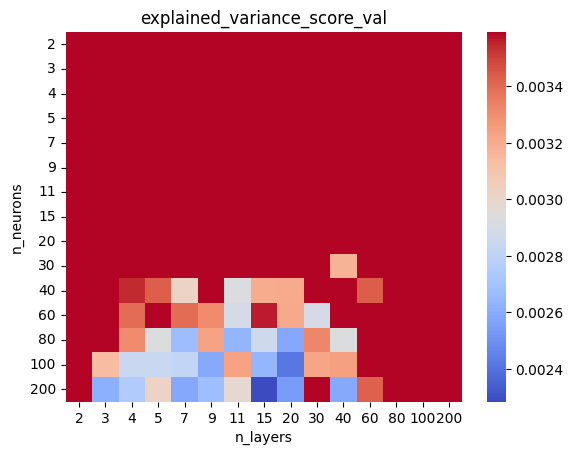

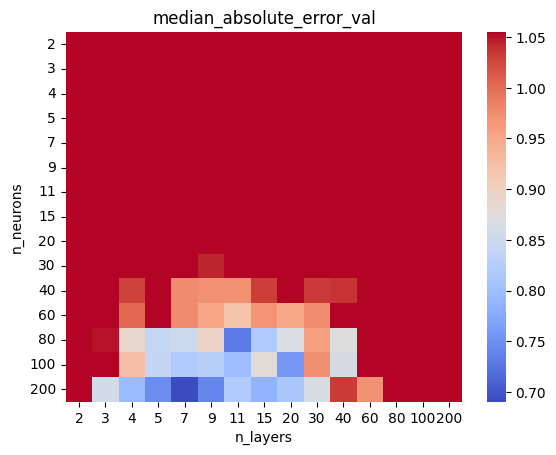

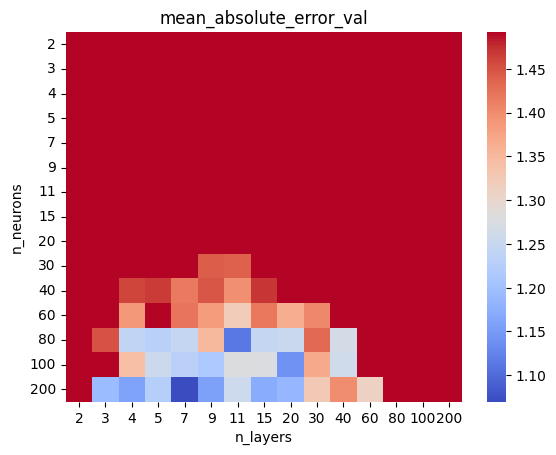

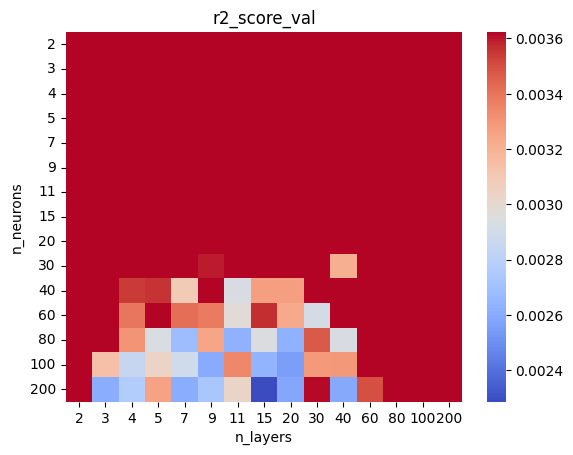

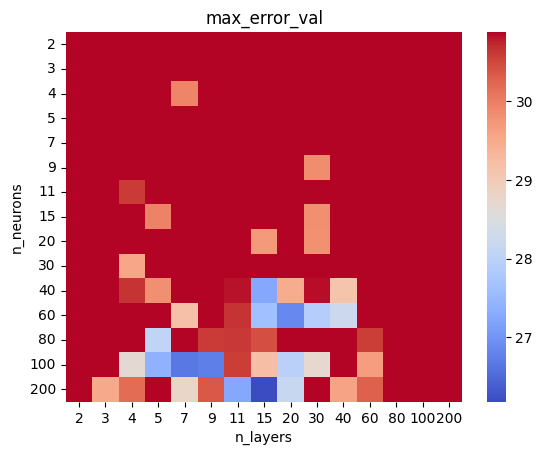

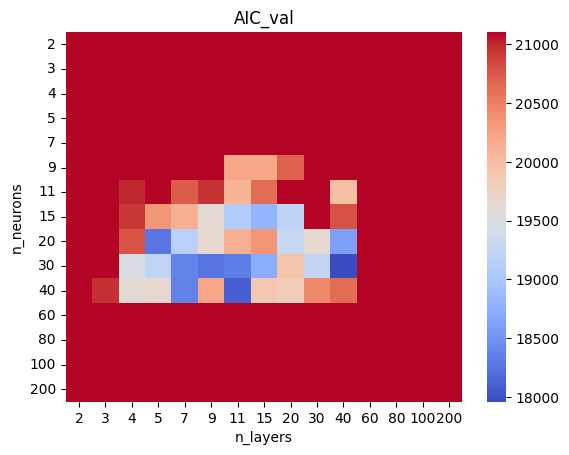

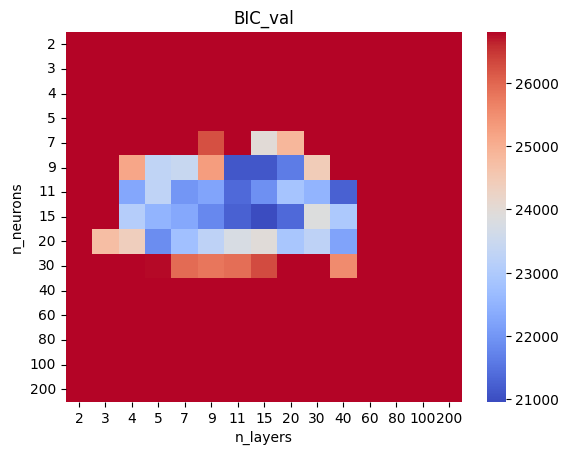

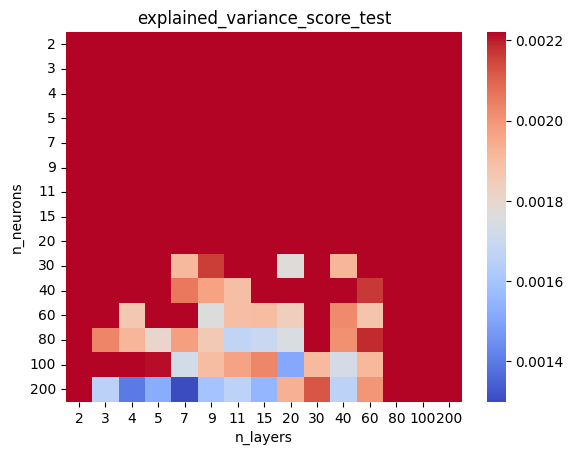

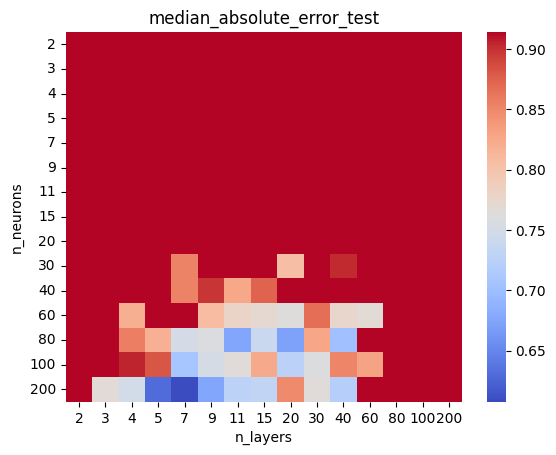

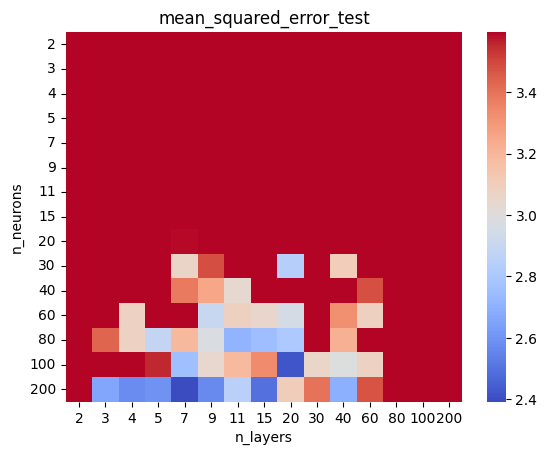

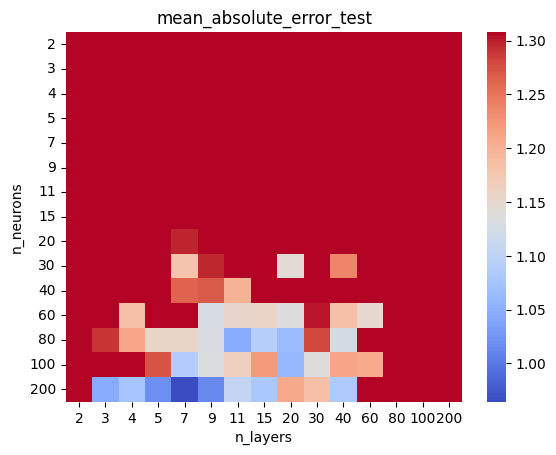

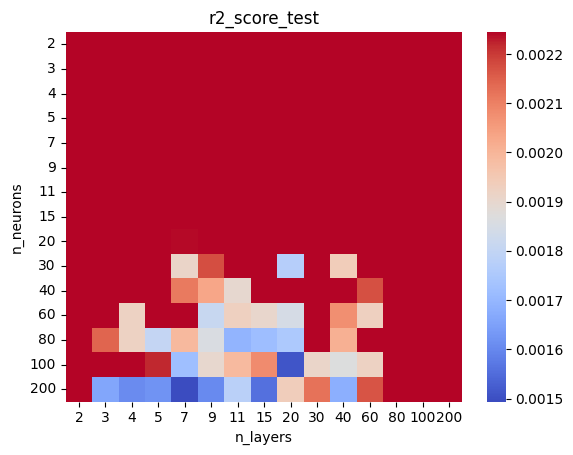

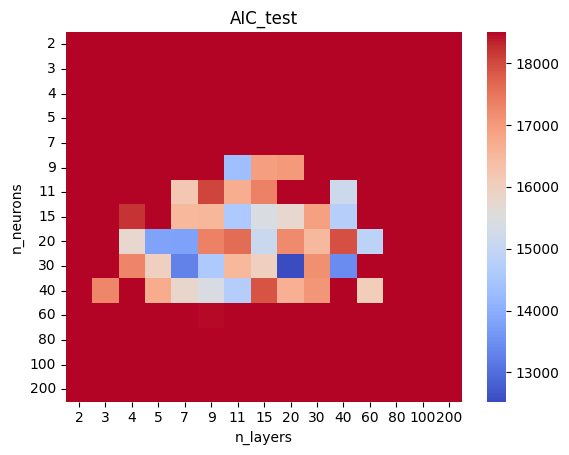

In [ ]:
to_plot_df = results_0_component.copy(deep=True).query('n_layers < 300')


for col in ['explained_variance_score_val', 'r2_score_val',
            'explained_variance_score_test', 'r2_score_test',
            'max_error_test']:
    to_plot_df[col] = 1 - to_plot_df[col]
for col in ['explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test']:

    pivot_table = to_plot_df.pivot_table(values=col, index='n_neurons',
                                         columns=['n_layers'])
    # fig = plt.fi
    # Вычислите пороговое значение по качеству метрик
    threshold = np.nanpercentile(pivot_table.values, 20)
    sns.heatmap(pivot_table, annot=False, cmap='coolwarm', vmax=threshold)
    plt.title(col)
    plt.savefig(f'{path_import[:-4]}/pics/{col}.png', dpi=1000)
    plt.show()


In [ ]:
saver(comp_0_7_200, 'comp_0_7_200')

saved in /content/drive/Shareddrives/project_1740/720/comp_0_7_200.pkl


In [ ]:
saver(cur_X_test_0, 'cur_X_test_0')
saver(comp_0_7_200.predict(cur_X_test_0), 'pred_y_test_0')
saver(cur_y_test_0, 'cur_y_test_0')

saver(cur_X_test_1, 'cur_X_test_1')
saver(cur_y_test_1, 'cur_y_test_1')
saver(comp_1_7_200.predict(cur_X_test_1), 'pred_y_test_1')

saver(cur_X_test_2, 'cur_X_test_2')
saver(cur_y_test_2, 'cur_y_test_2')
saver(comp_2_7_200.predict(cur_X_test_2), 'pred_y_test_2')


In [ ]:
for i in range(len(cur_y_train) // 20):
    plt.plot(comp_0_7_200.predict(cur_X_train[i:i+20]))
    plt.plot(cur_y_train[i:i+20])

In [ ]:
for i in range(len(pred_y_test_2) // 20):
    plt.plot(pred_y_test_2[i:i+20])
    plt.plot(cur_y_test_2[i:i+20])
    plt.savefig(path_import+'/gr/'+str(cur_X_train[i])+'.png')

In [ ]:
results_1_component = pd.read_csv(path_import+'results_1_component.csv',
                                  names=[
            # Constructional
            'n_layers', 'n_neurons', 'solver', 'max_iter',
            'learning_rate_init', 'learning_rate', 'early_stopping',
            'activation', 'n_splits', 'alpha',

            # Resultant _val
            'explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]).drop_duplicates()
results_1_component.head()

n_layers  n_neurons solver  max_iter  learning_rate_init learning_rate  \
0         7        200   adam       200               0.001      constant   
1         7        200   adam       200               0.001      constant   
2         2          2   adam       200               0.001      constant   
3         2          3   adam       200               0.001      constant   
4         2          4   adam       200               0.001      constant   

   early_stopping activation  n_splits   alpha  ...        AIC_val  \
0            True       relu         5  0.0001  ...  145198.005914   
1            True       relu         5  0.0001  ...  130331.071184   
2            True       relu         5  0.0001  ...   90959.220379   
3            True       relu         5  0.0001  ...   76737.779823   
4            True       relu         5  0.0001  ...   74948.925772   

         BIC_val  explained_variance_score_test  median_absolute_error_test  \
0  440821.961165                       0.985385                    8.741612   
1  425955.026435                       0.994822                    5.219850   
2   91060.165144                       0.508401                   54.633901   
3   76910.827992                       0.839759                   29.762105   
4   75208.498026                       0.859535                   25.850148   

   mean_squared_error_test  mean_absolute_error_test  r2_score_test  \
0               212.613987                 11.112629       0.985227   
1                74.987131                  6.657077       0.994790   
2              9006.520175                 73.566906       0.374214   
3              2326.767951                 37.396806       0.838333   
4              2035.391638                 34.284135       0.858578   

   max_error_test       AIC_test       BIC_test  
0       52.399585  135594.782537  431218.737788  
1       34.996882  125173.165126  420797.120377  
2      286.090928   91085.040579   91185.985344  
3      183.336829   77570.354381   77743.402550  
4      151.143623   76256.435304   76516.007558  

[5 rows x 26 columns]

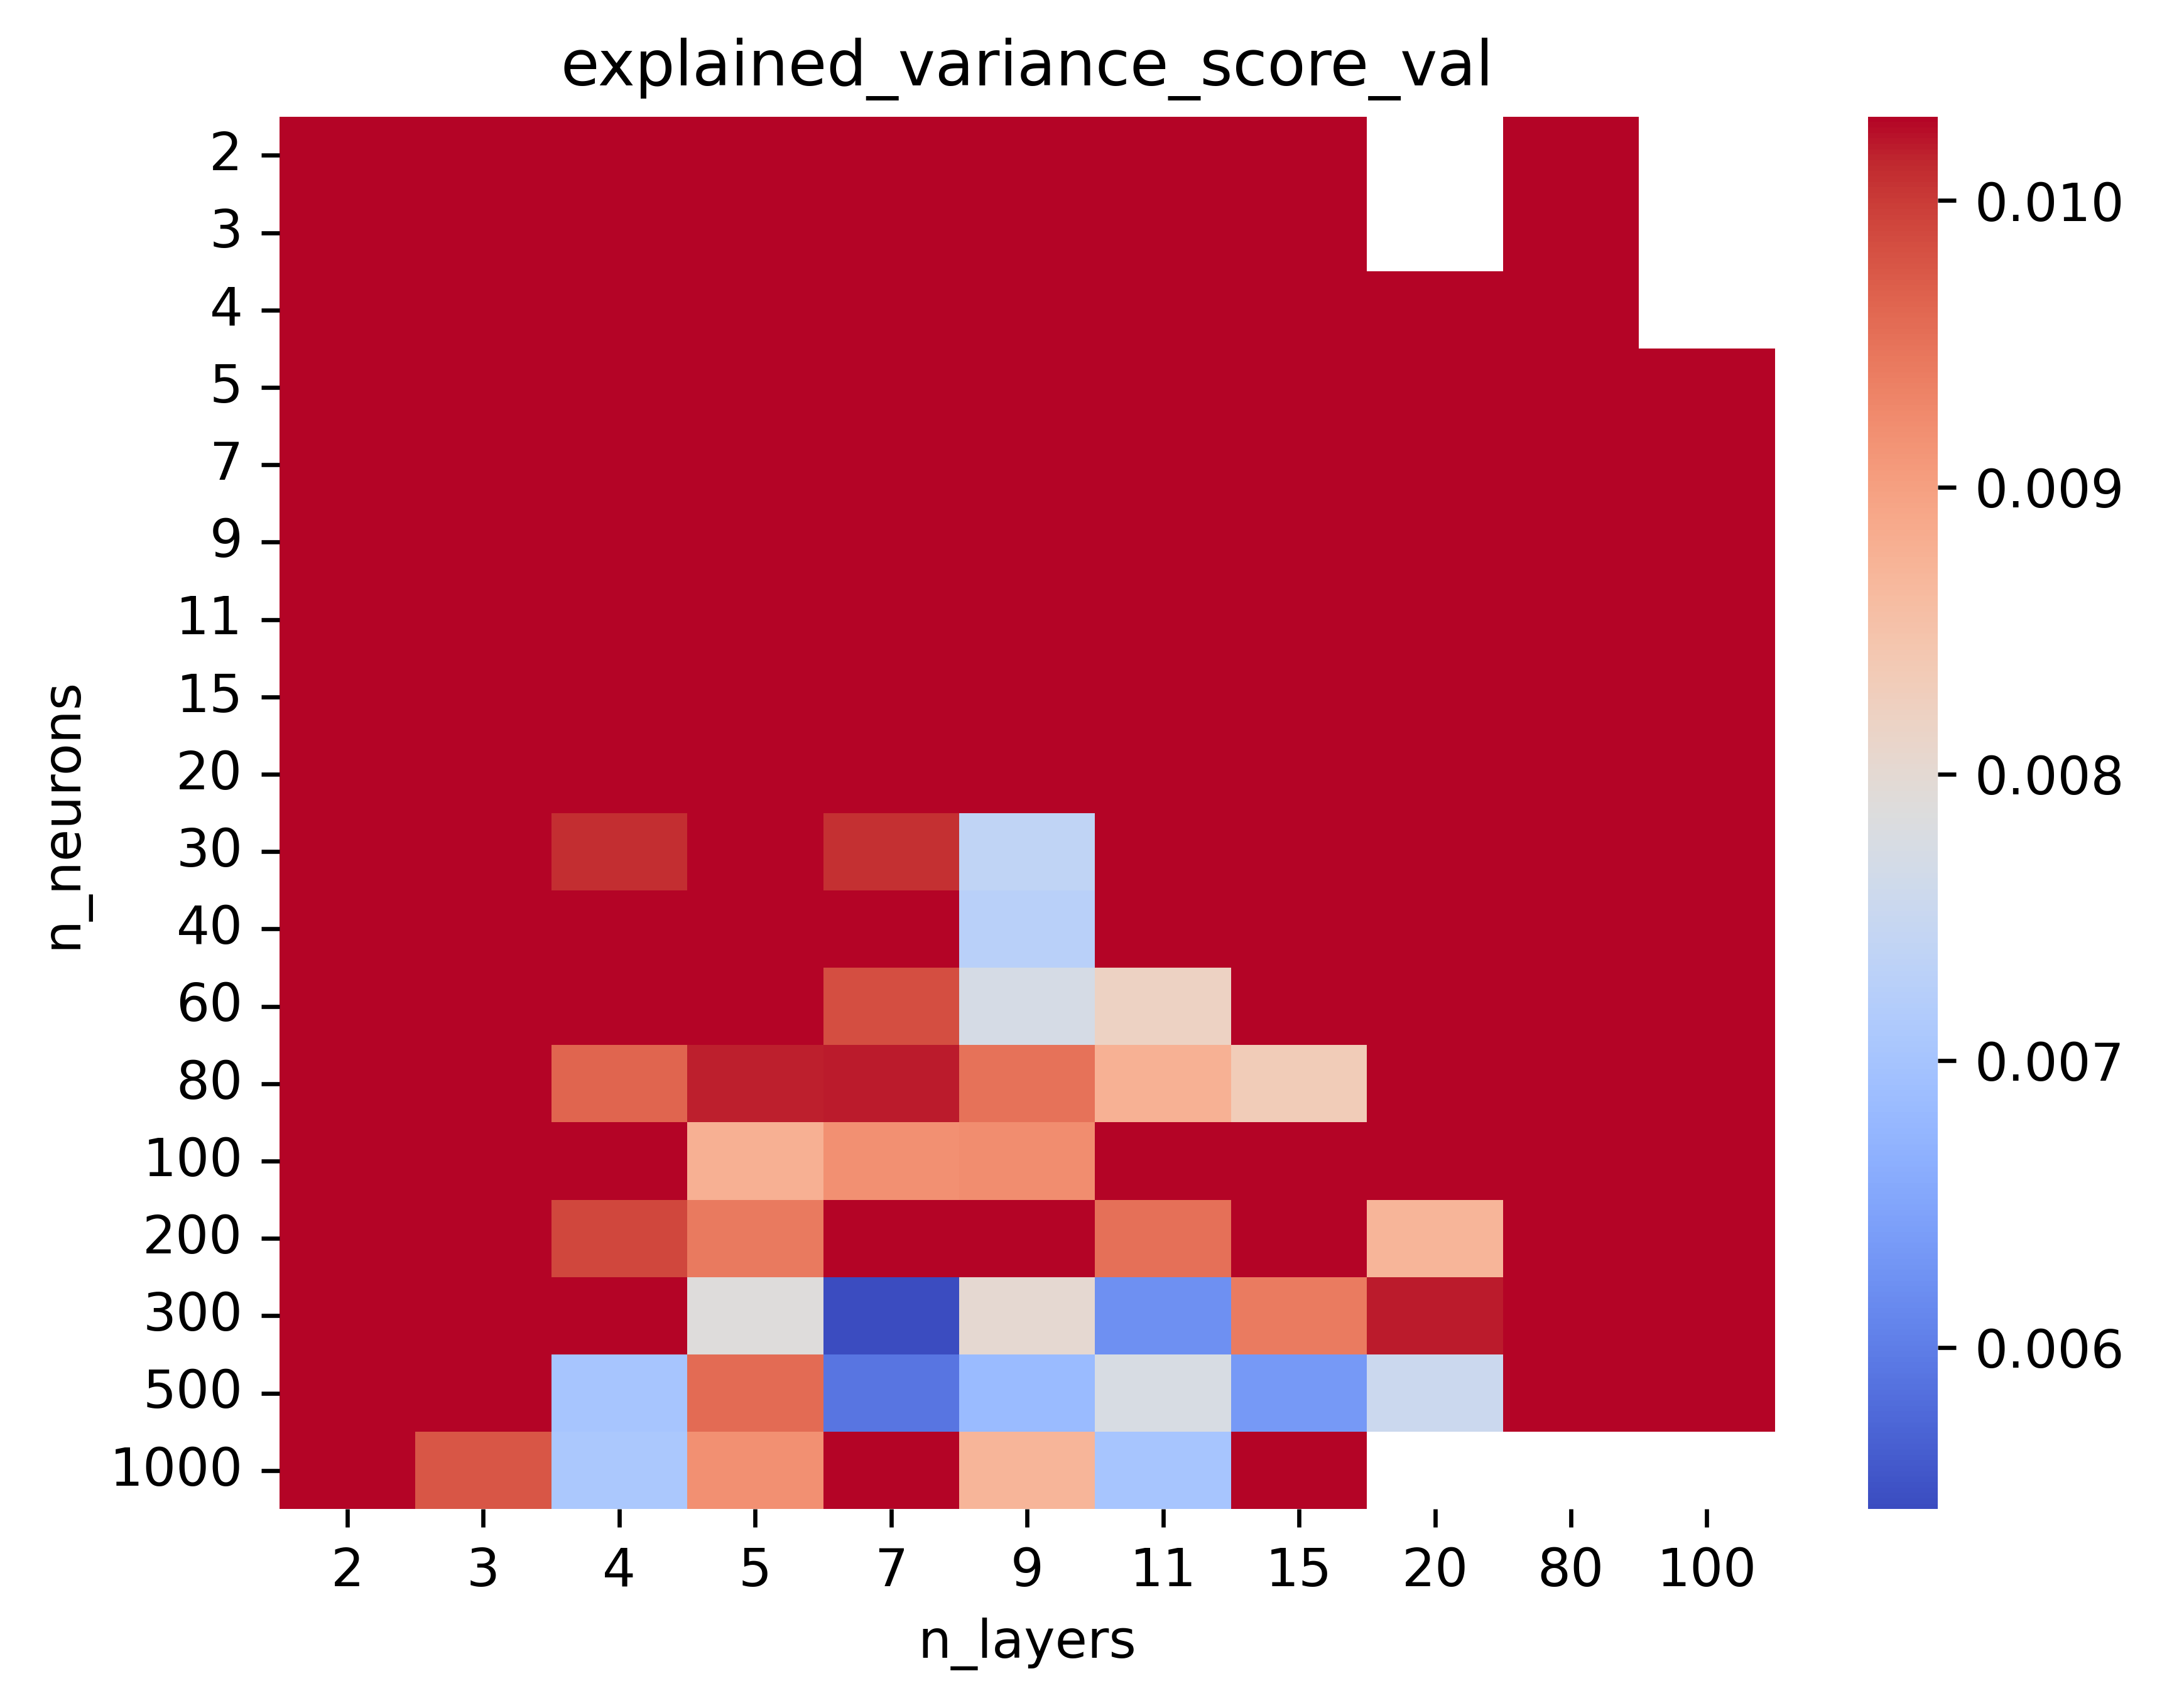

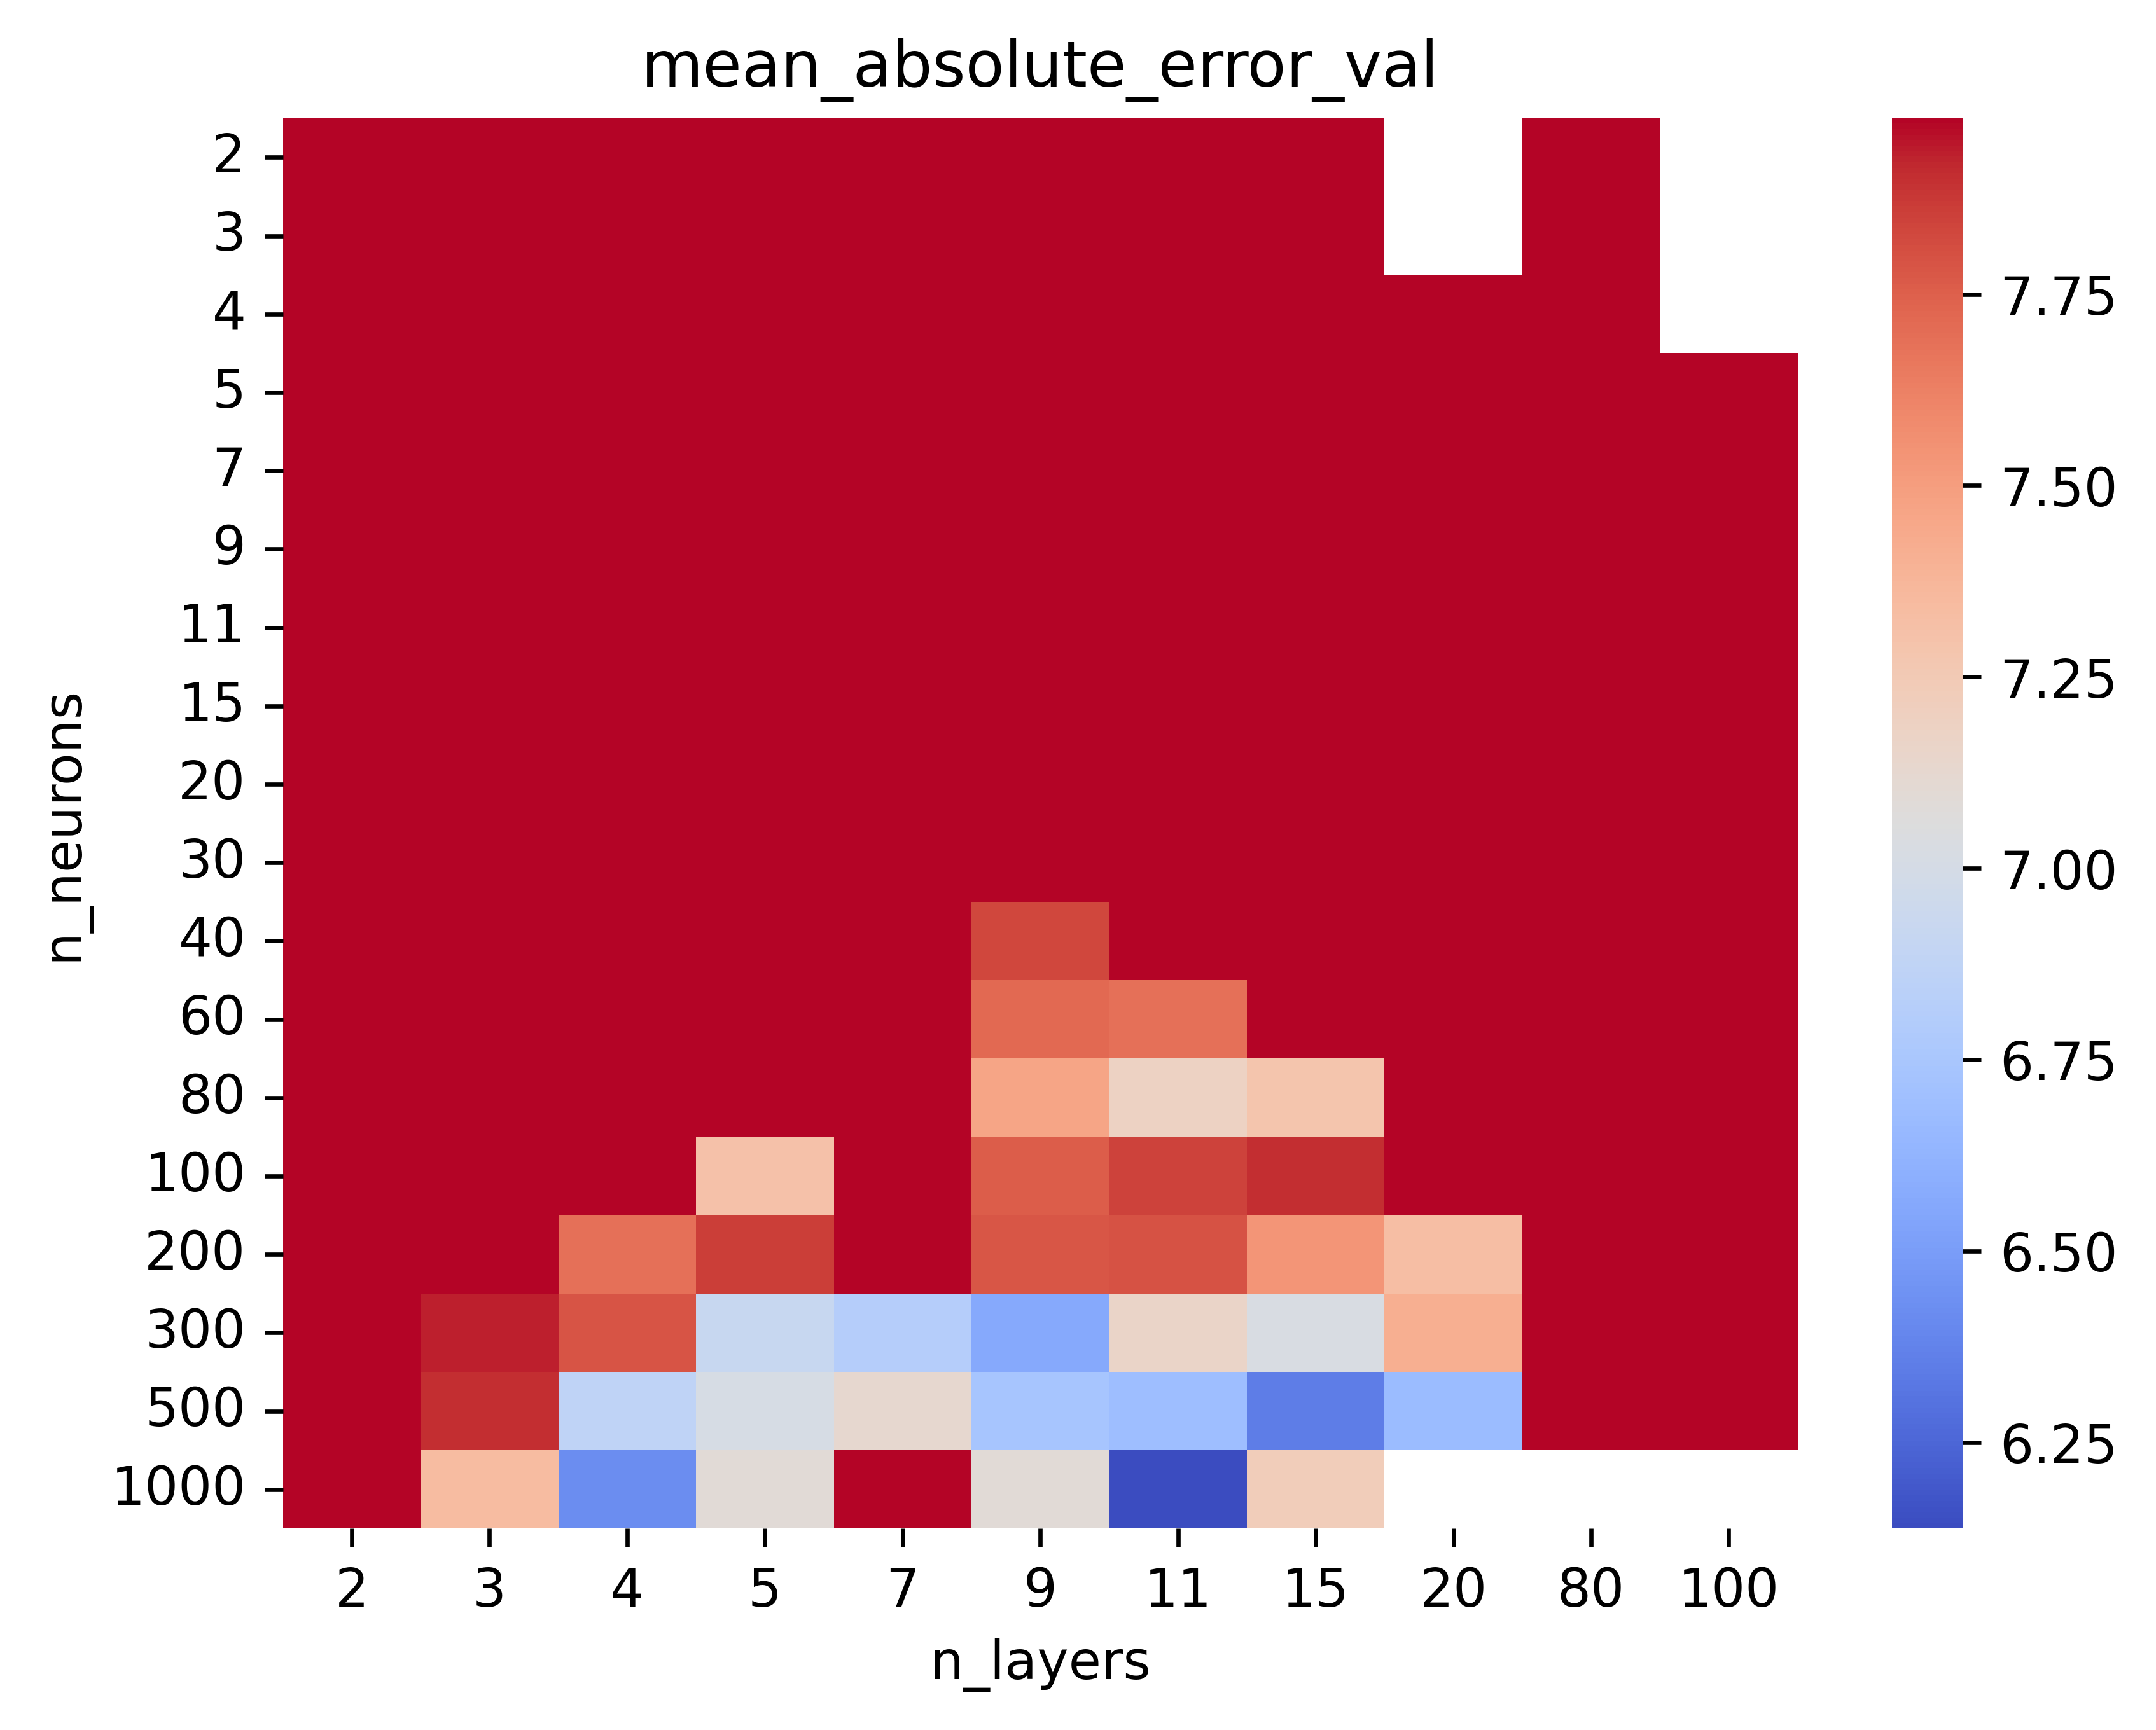

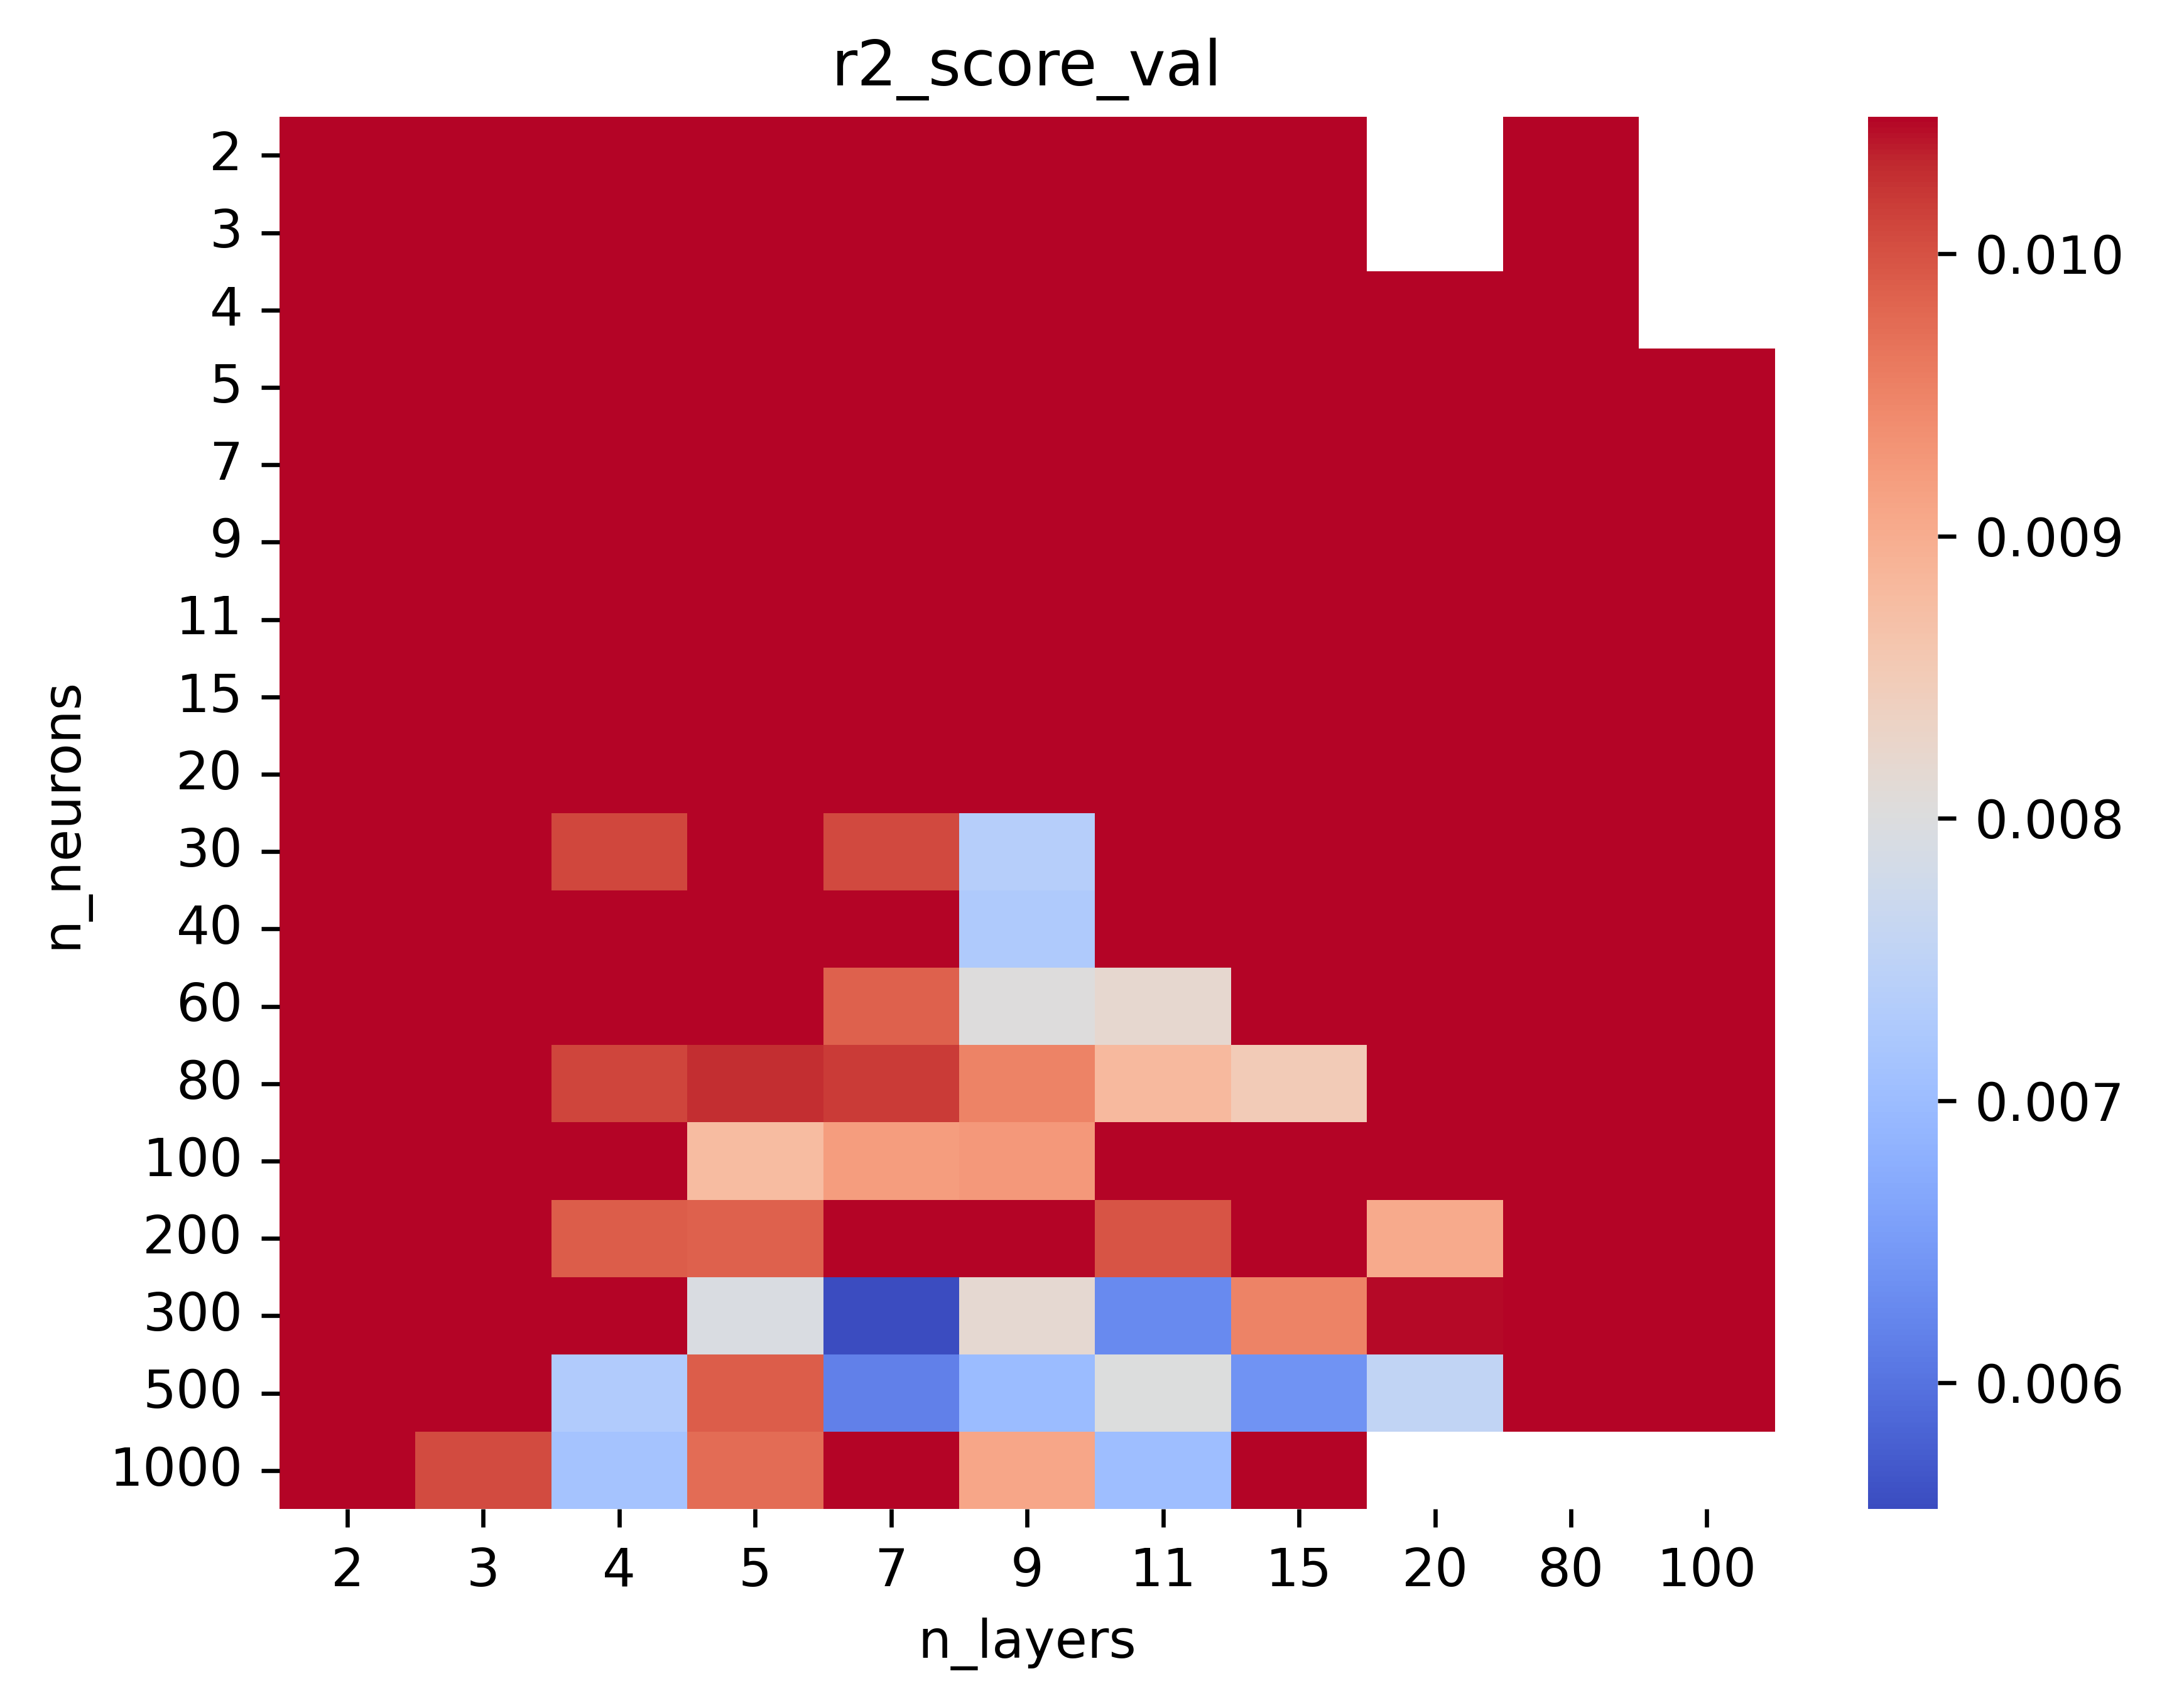

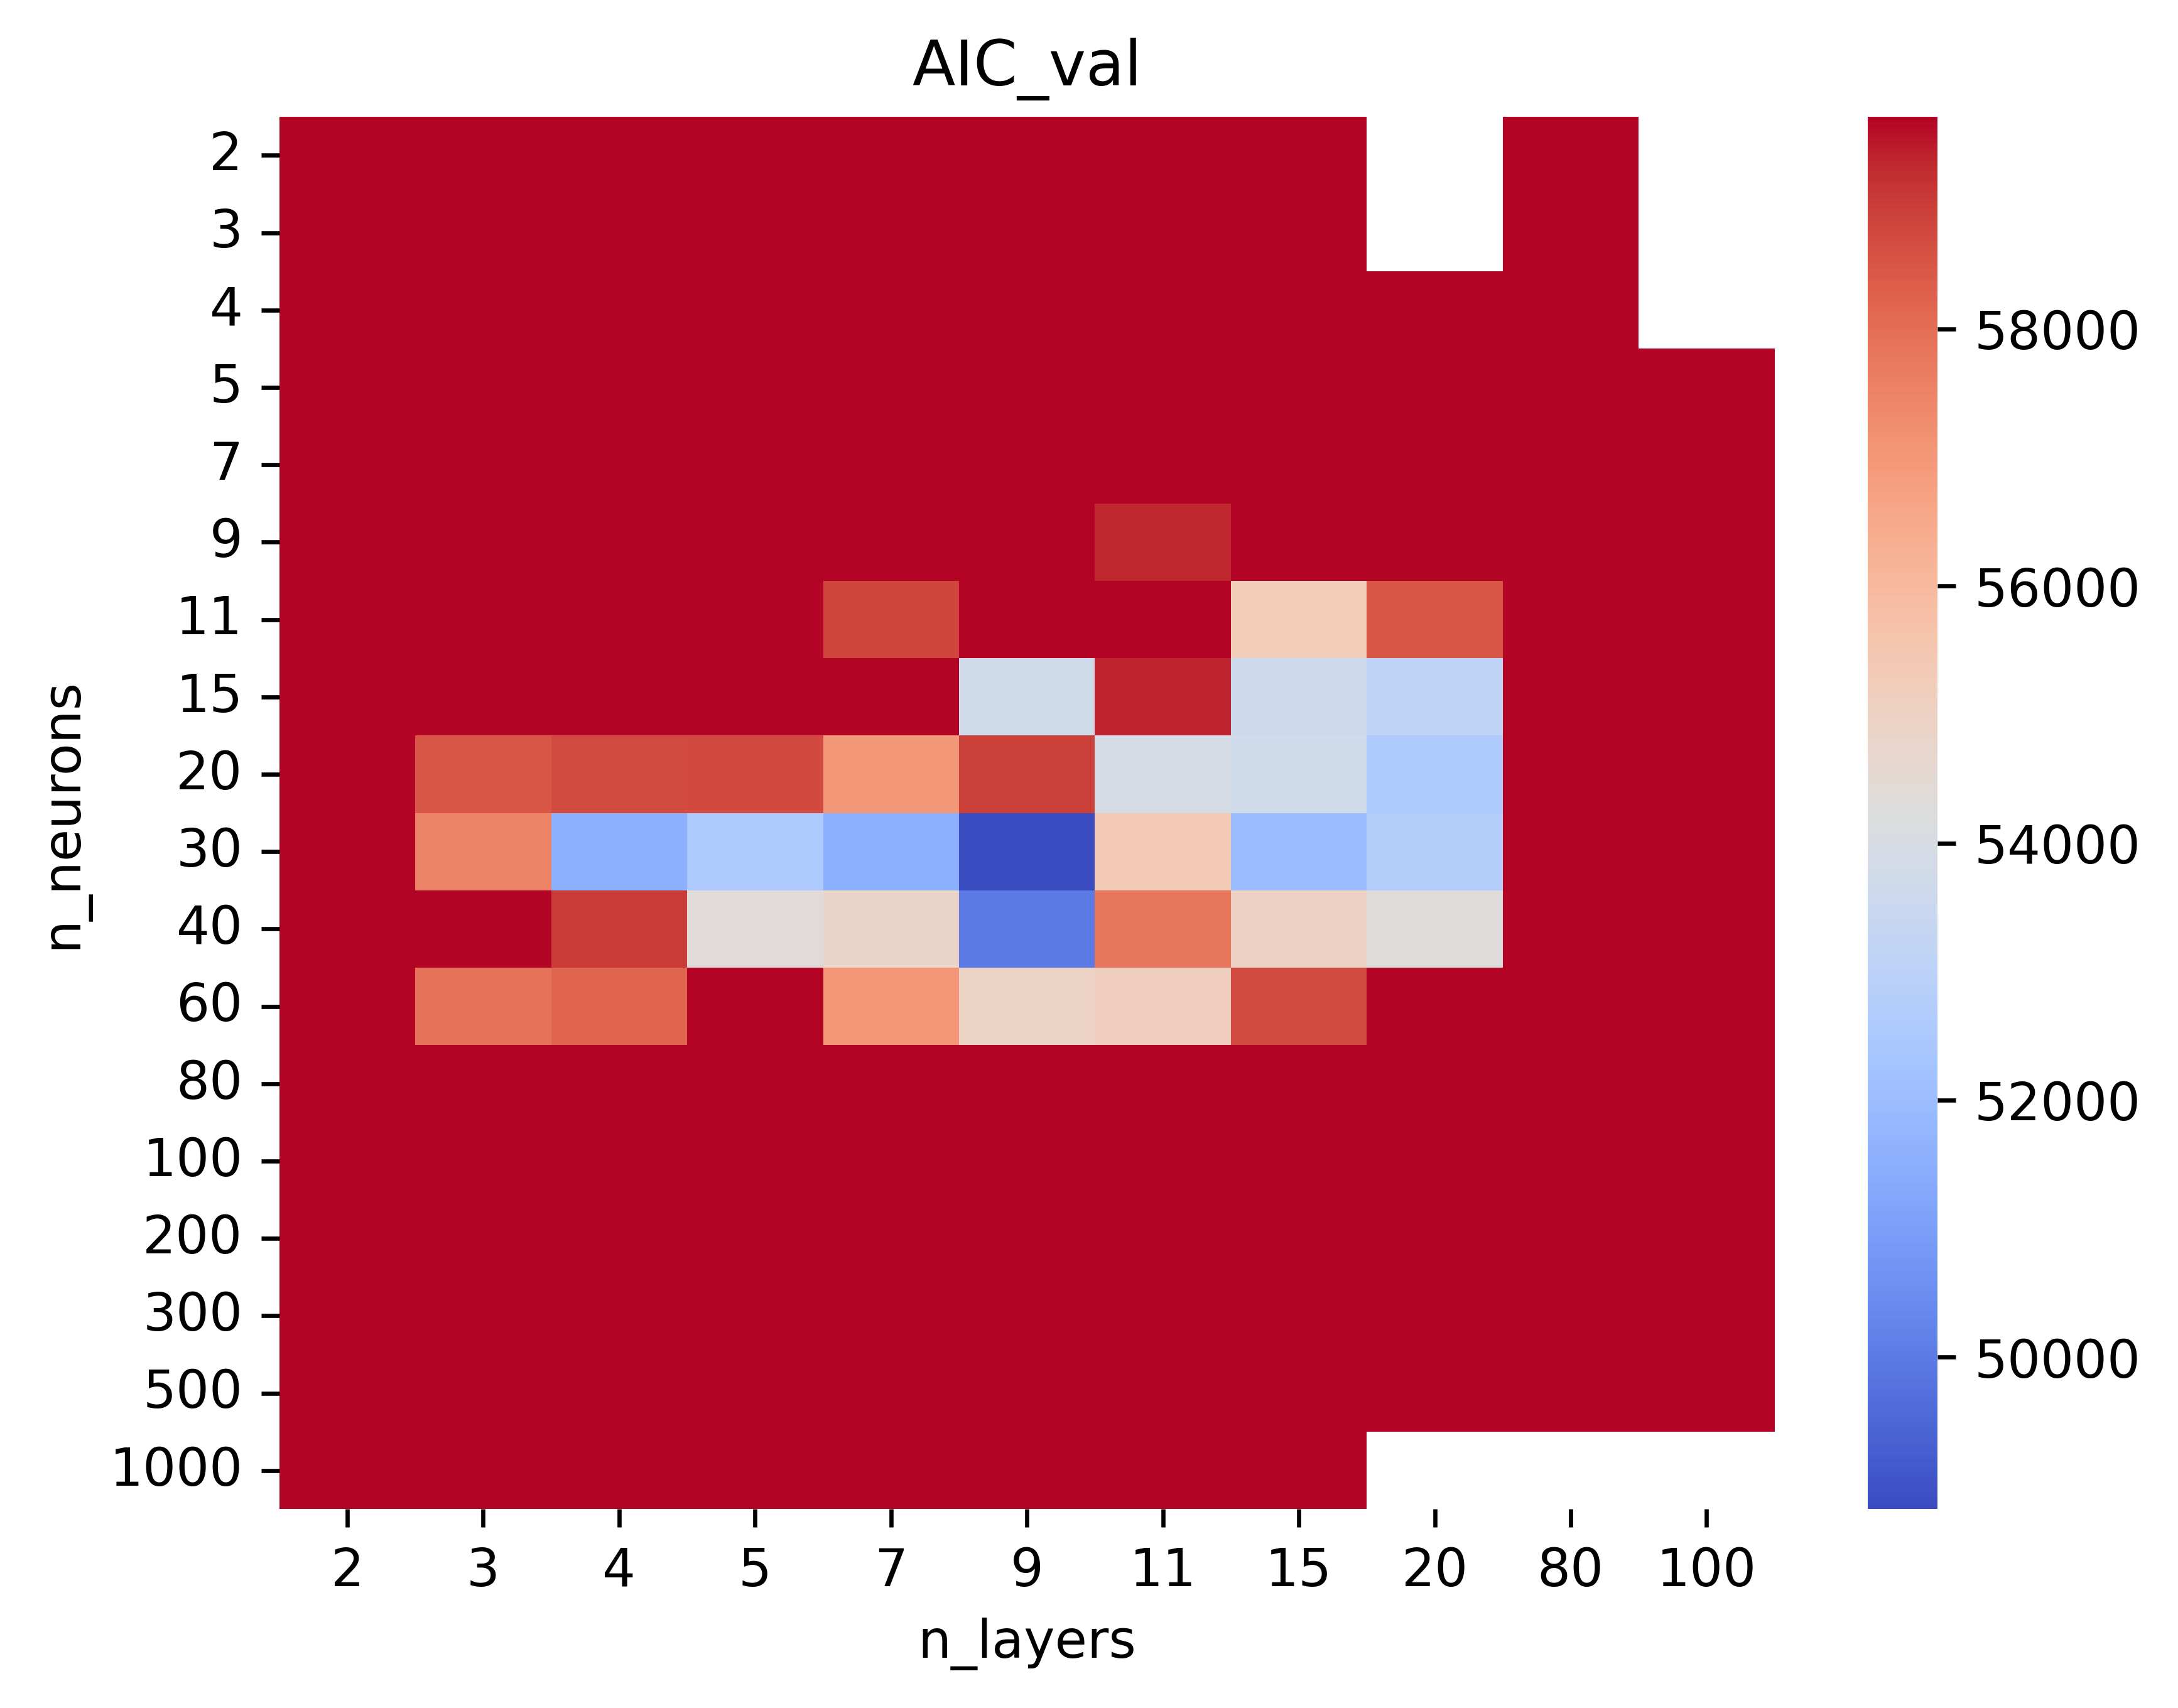

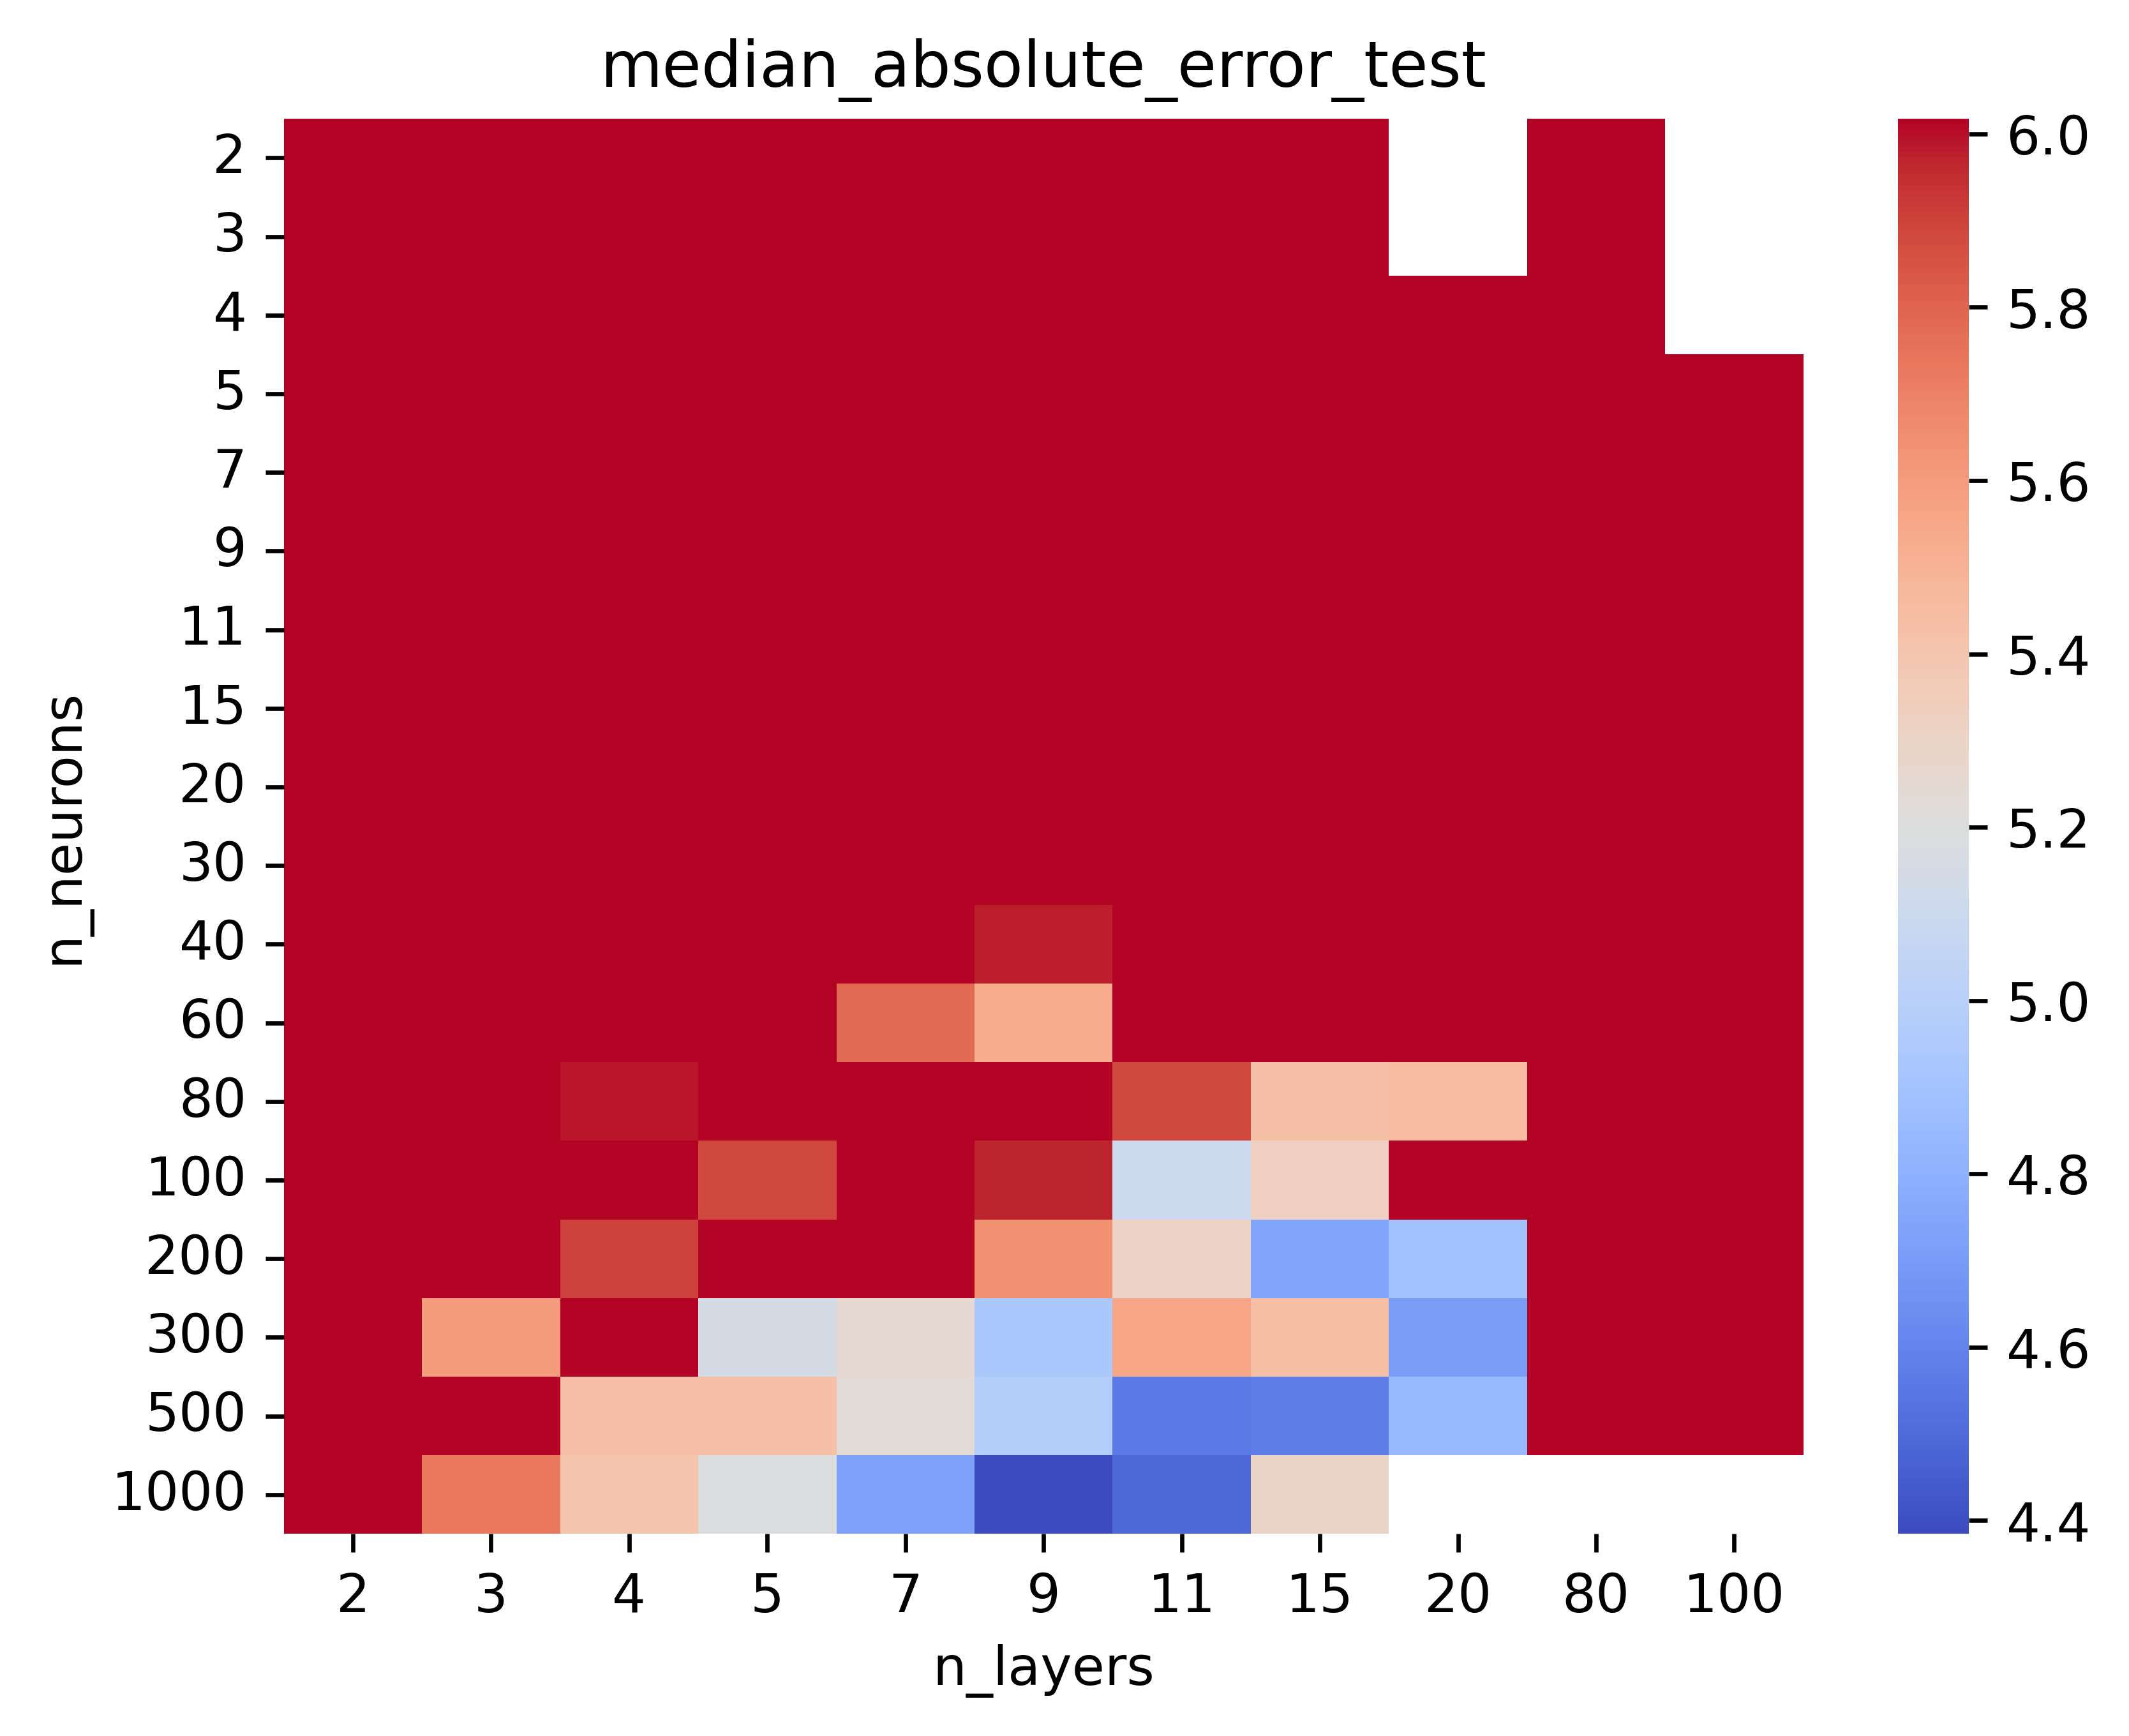

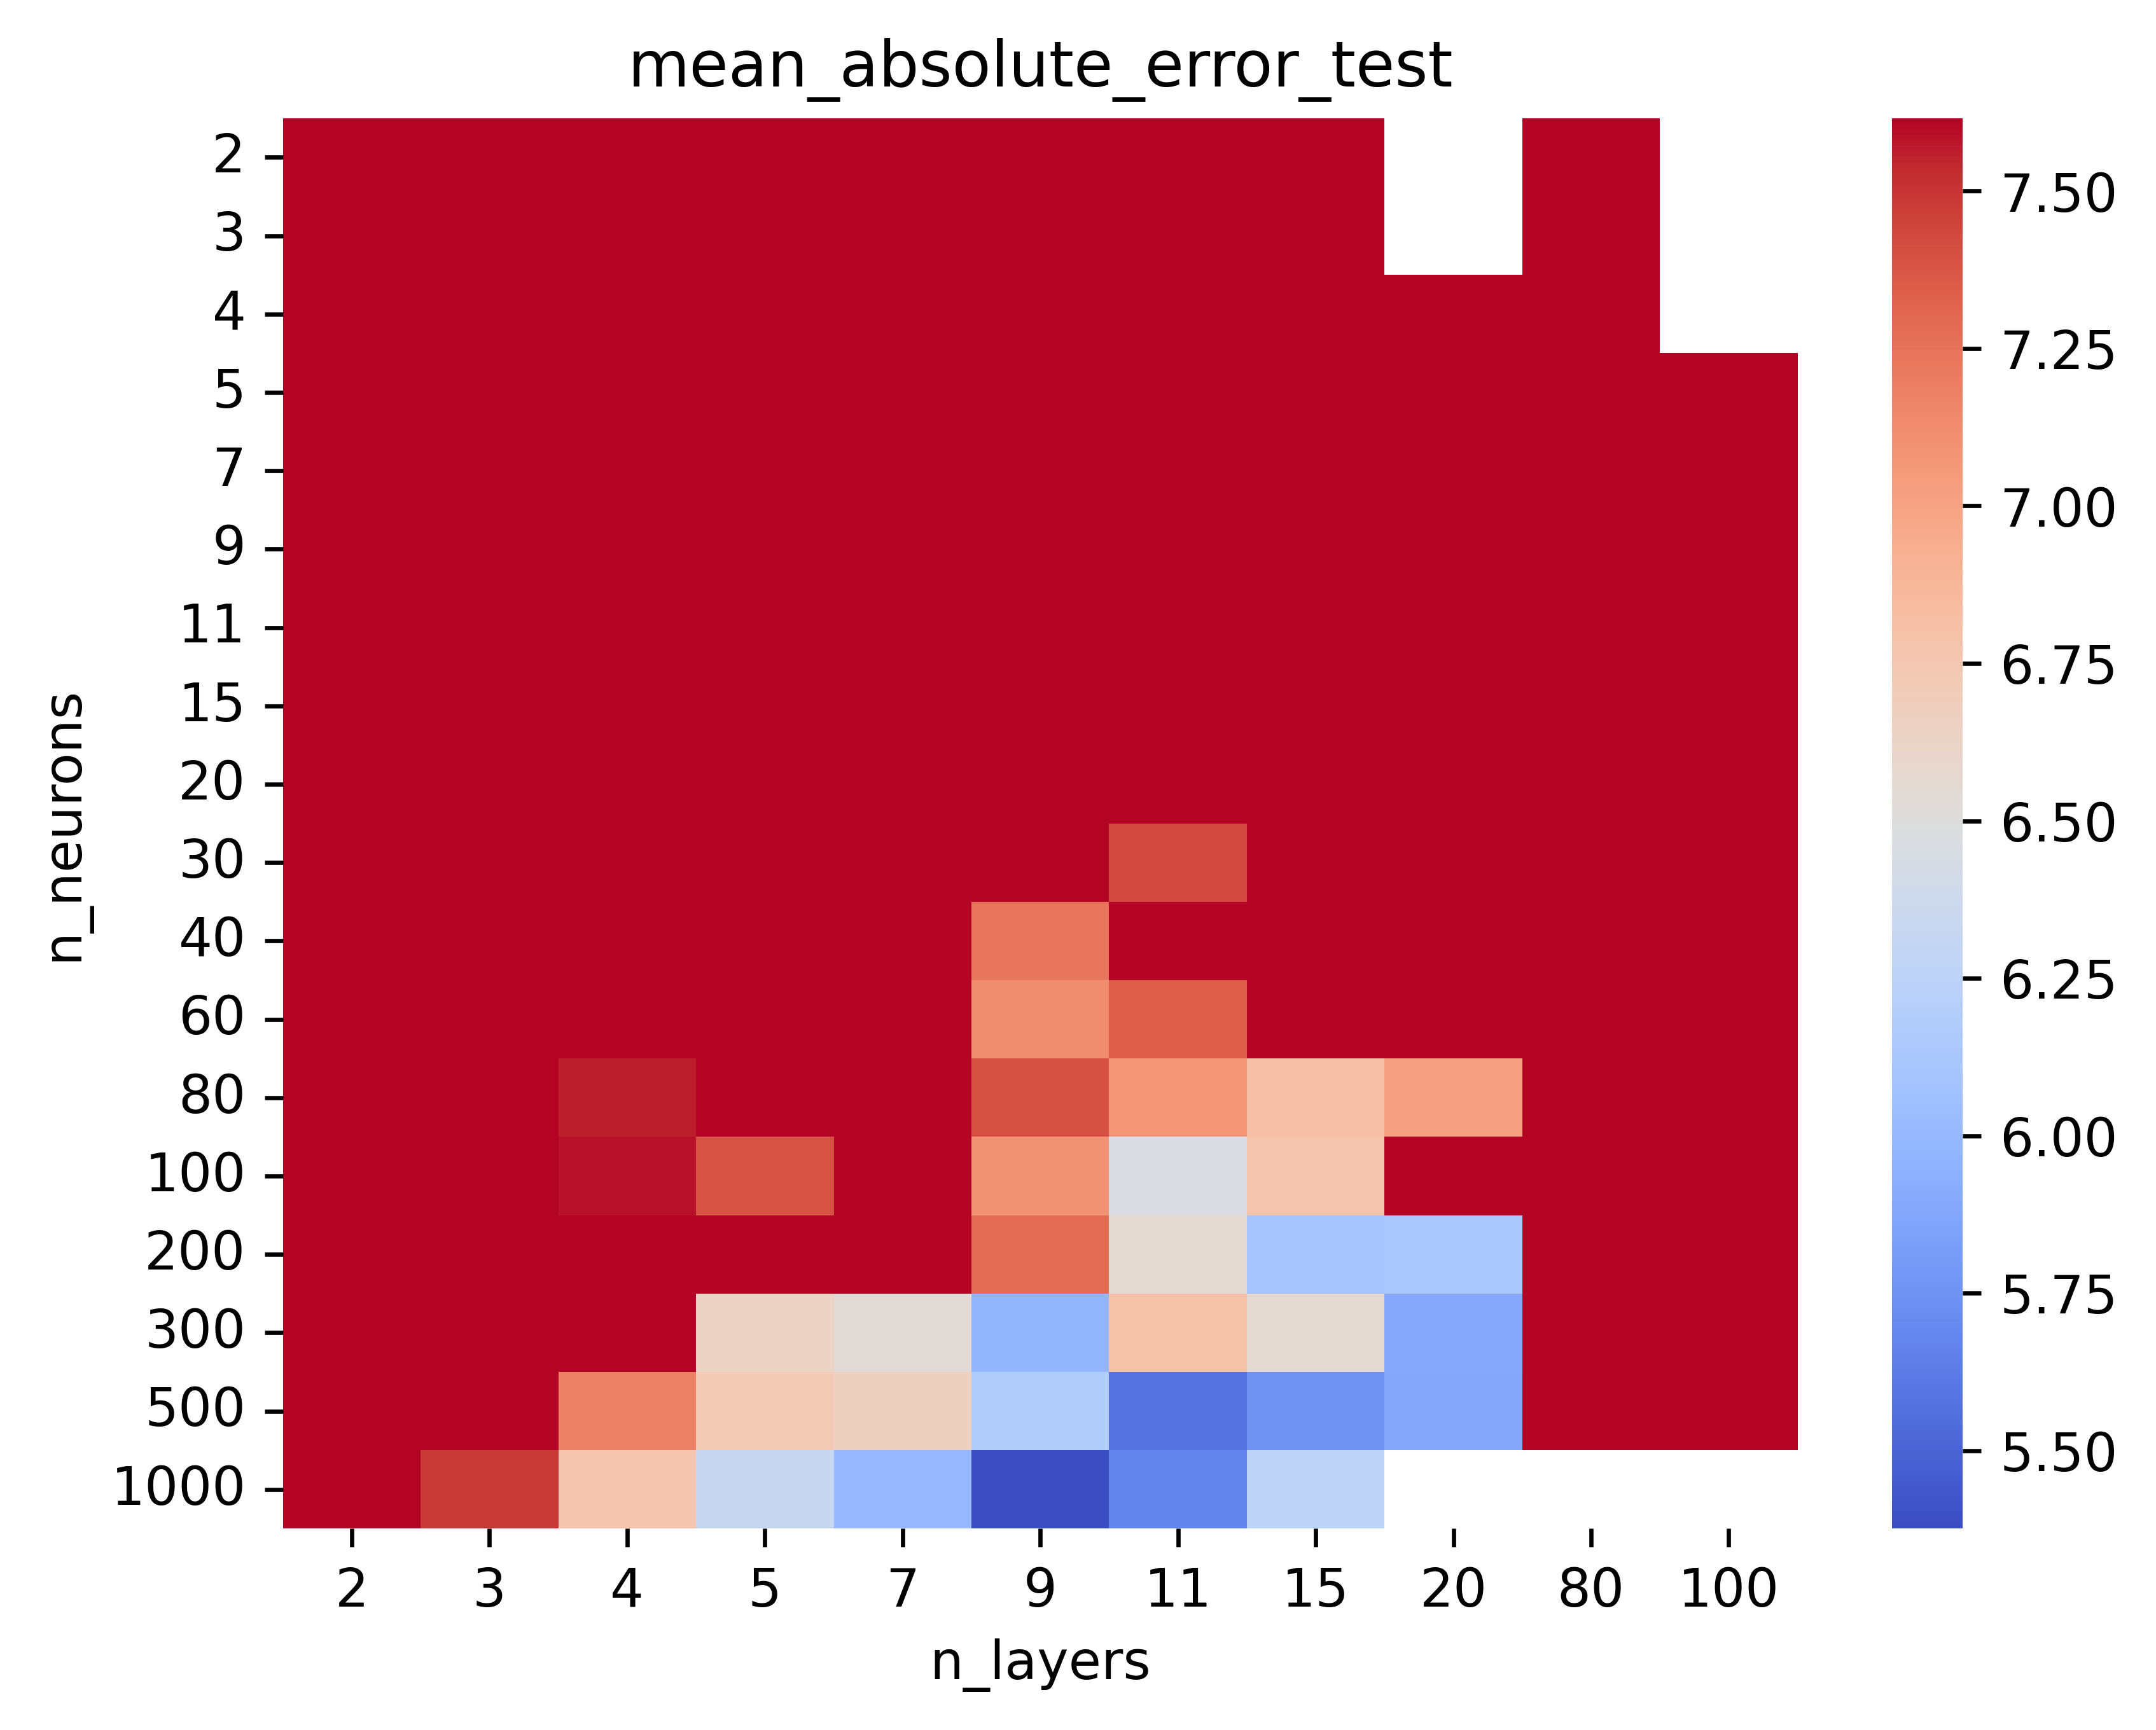

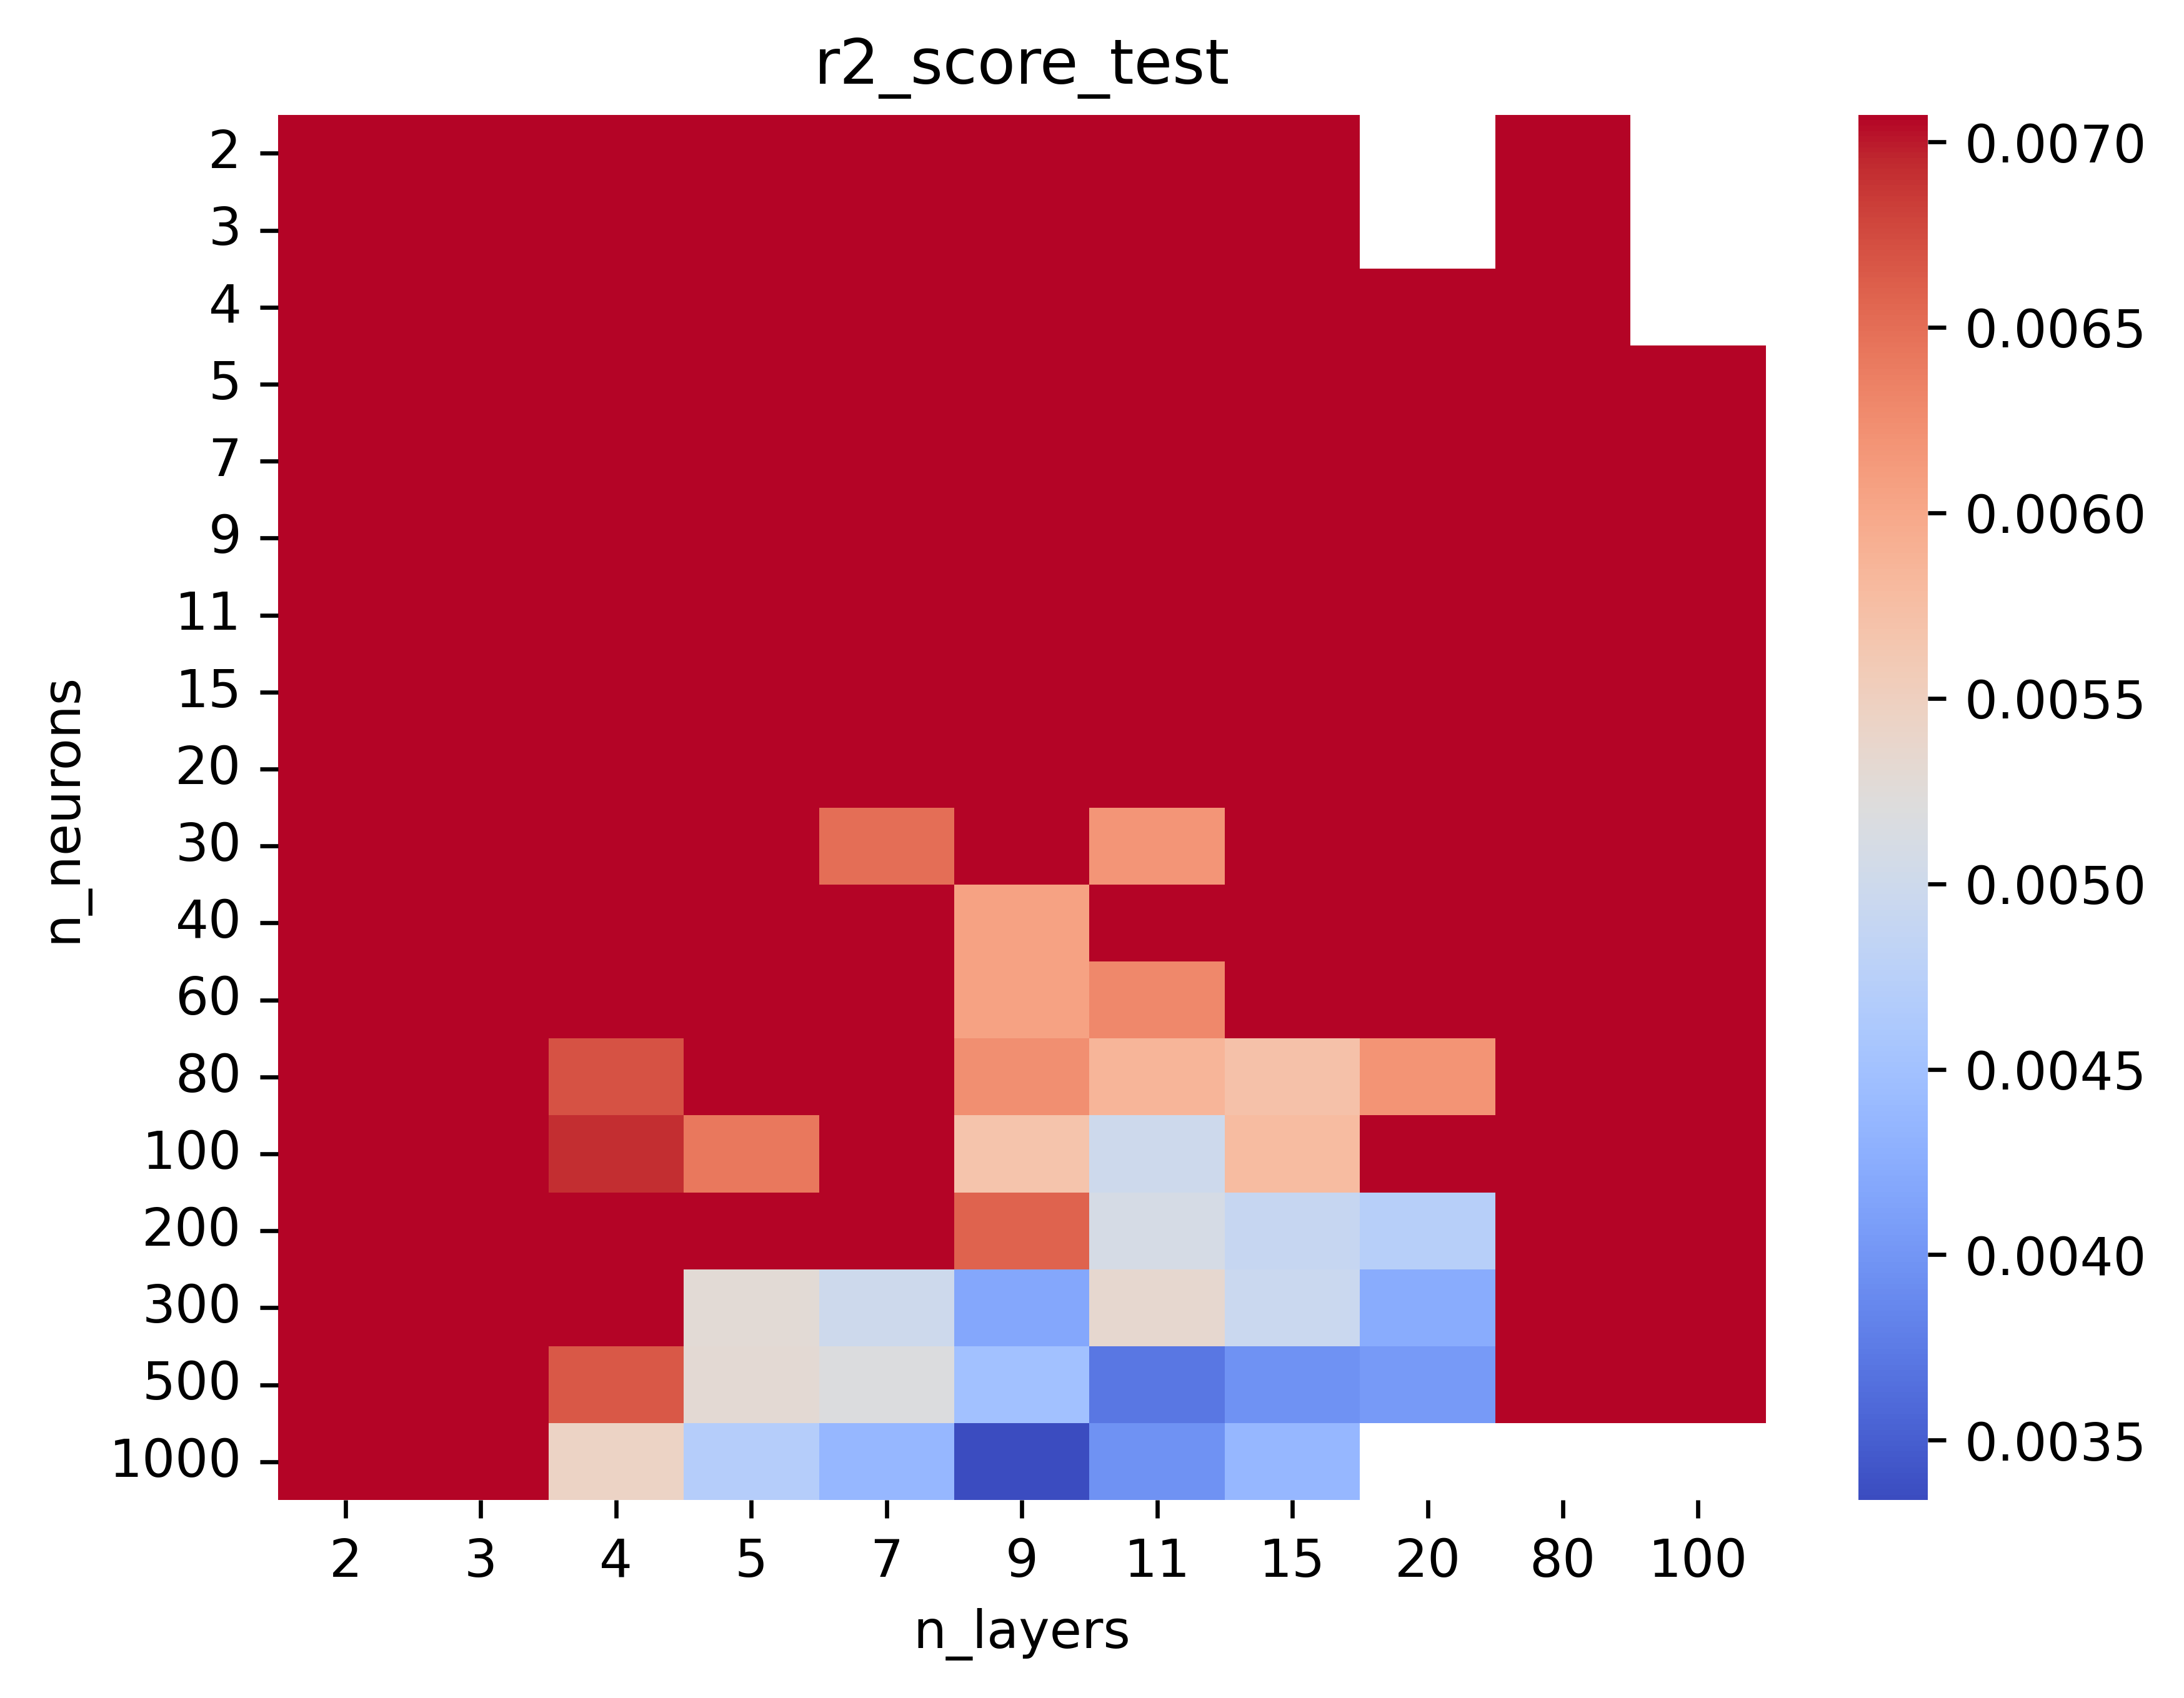

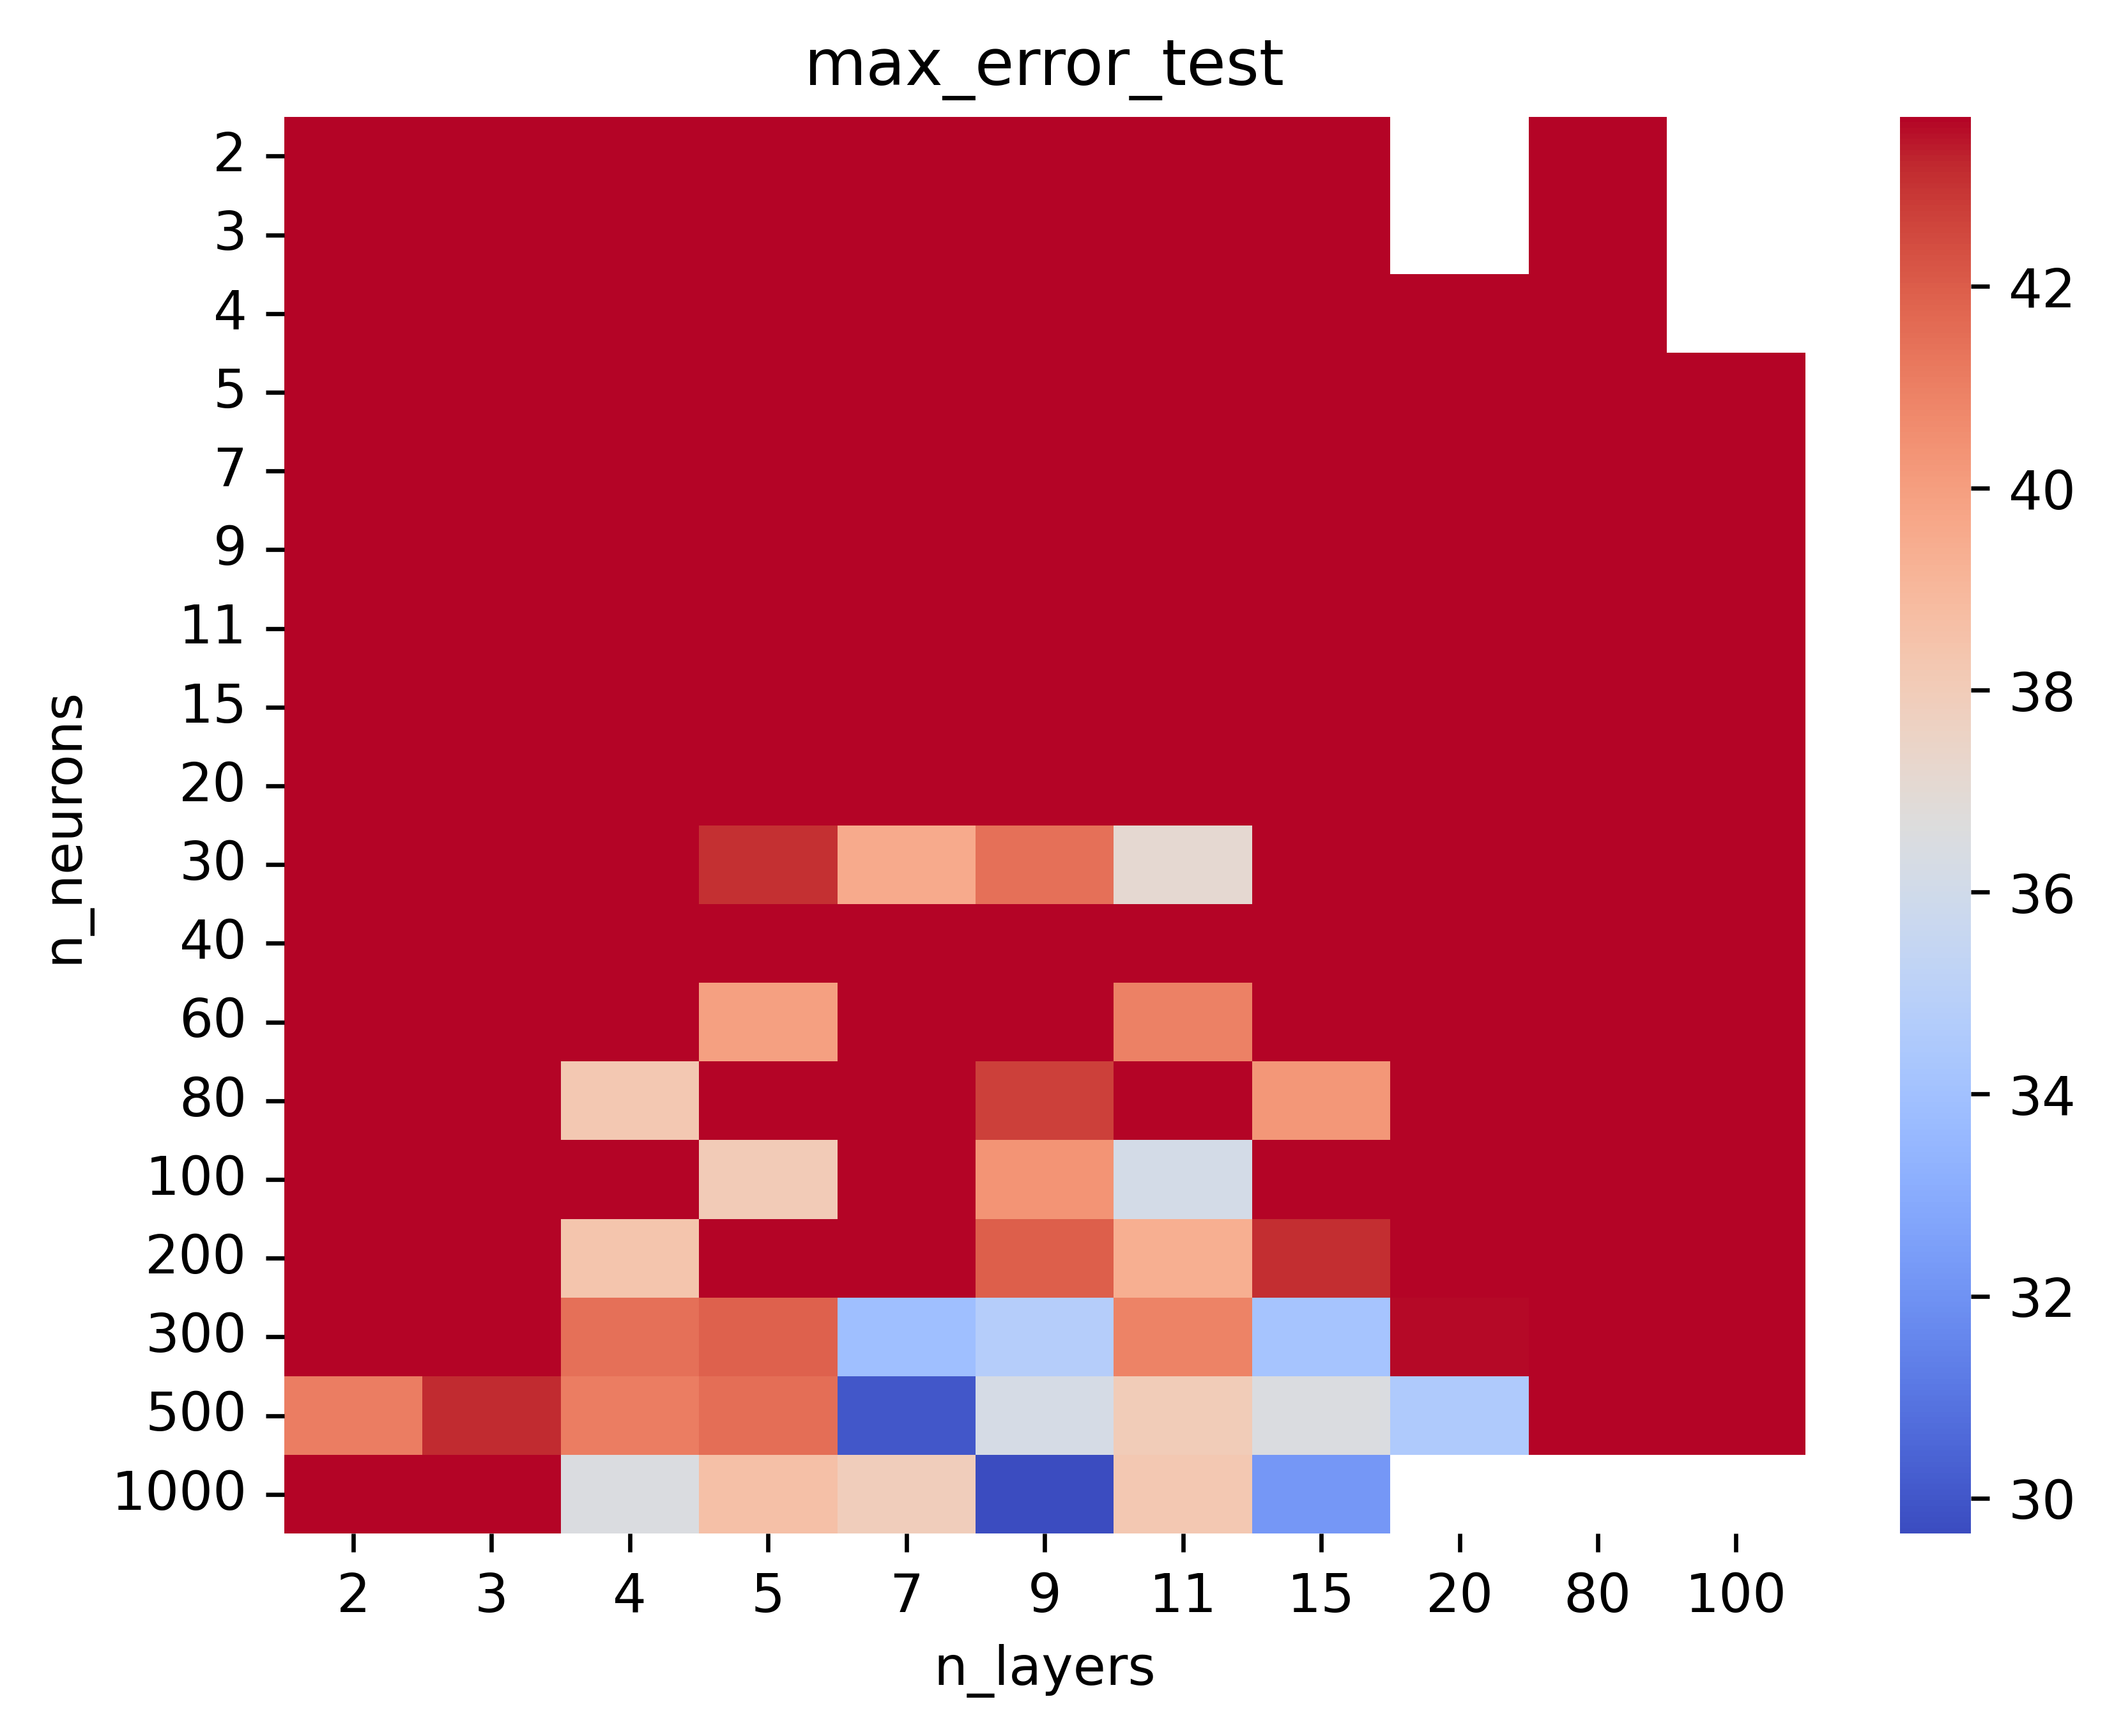

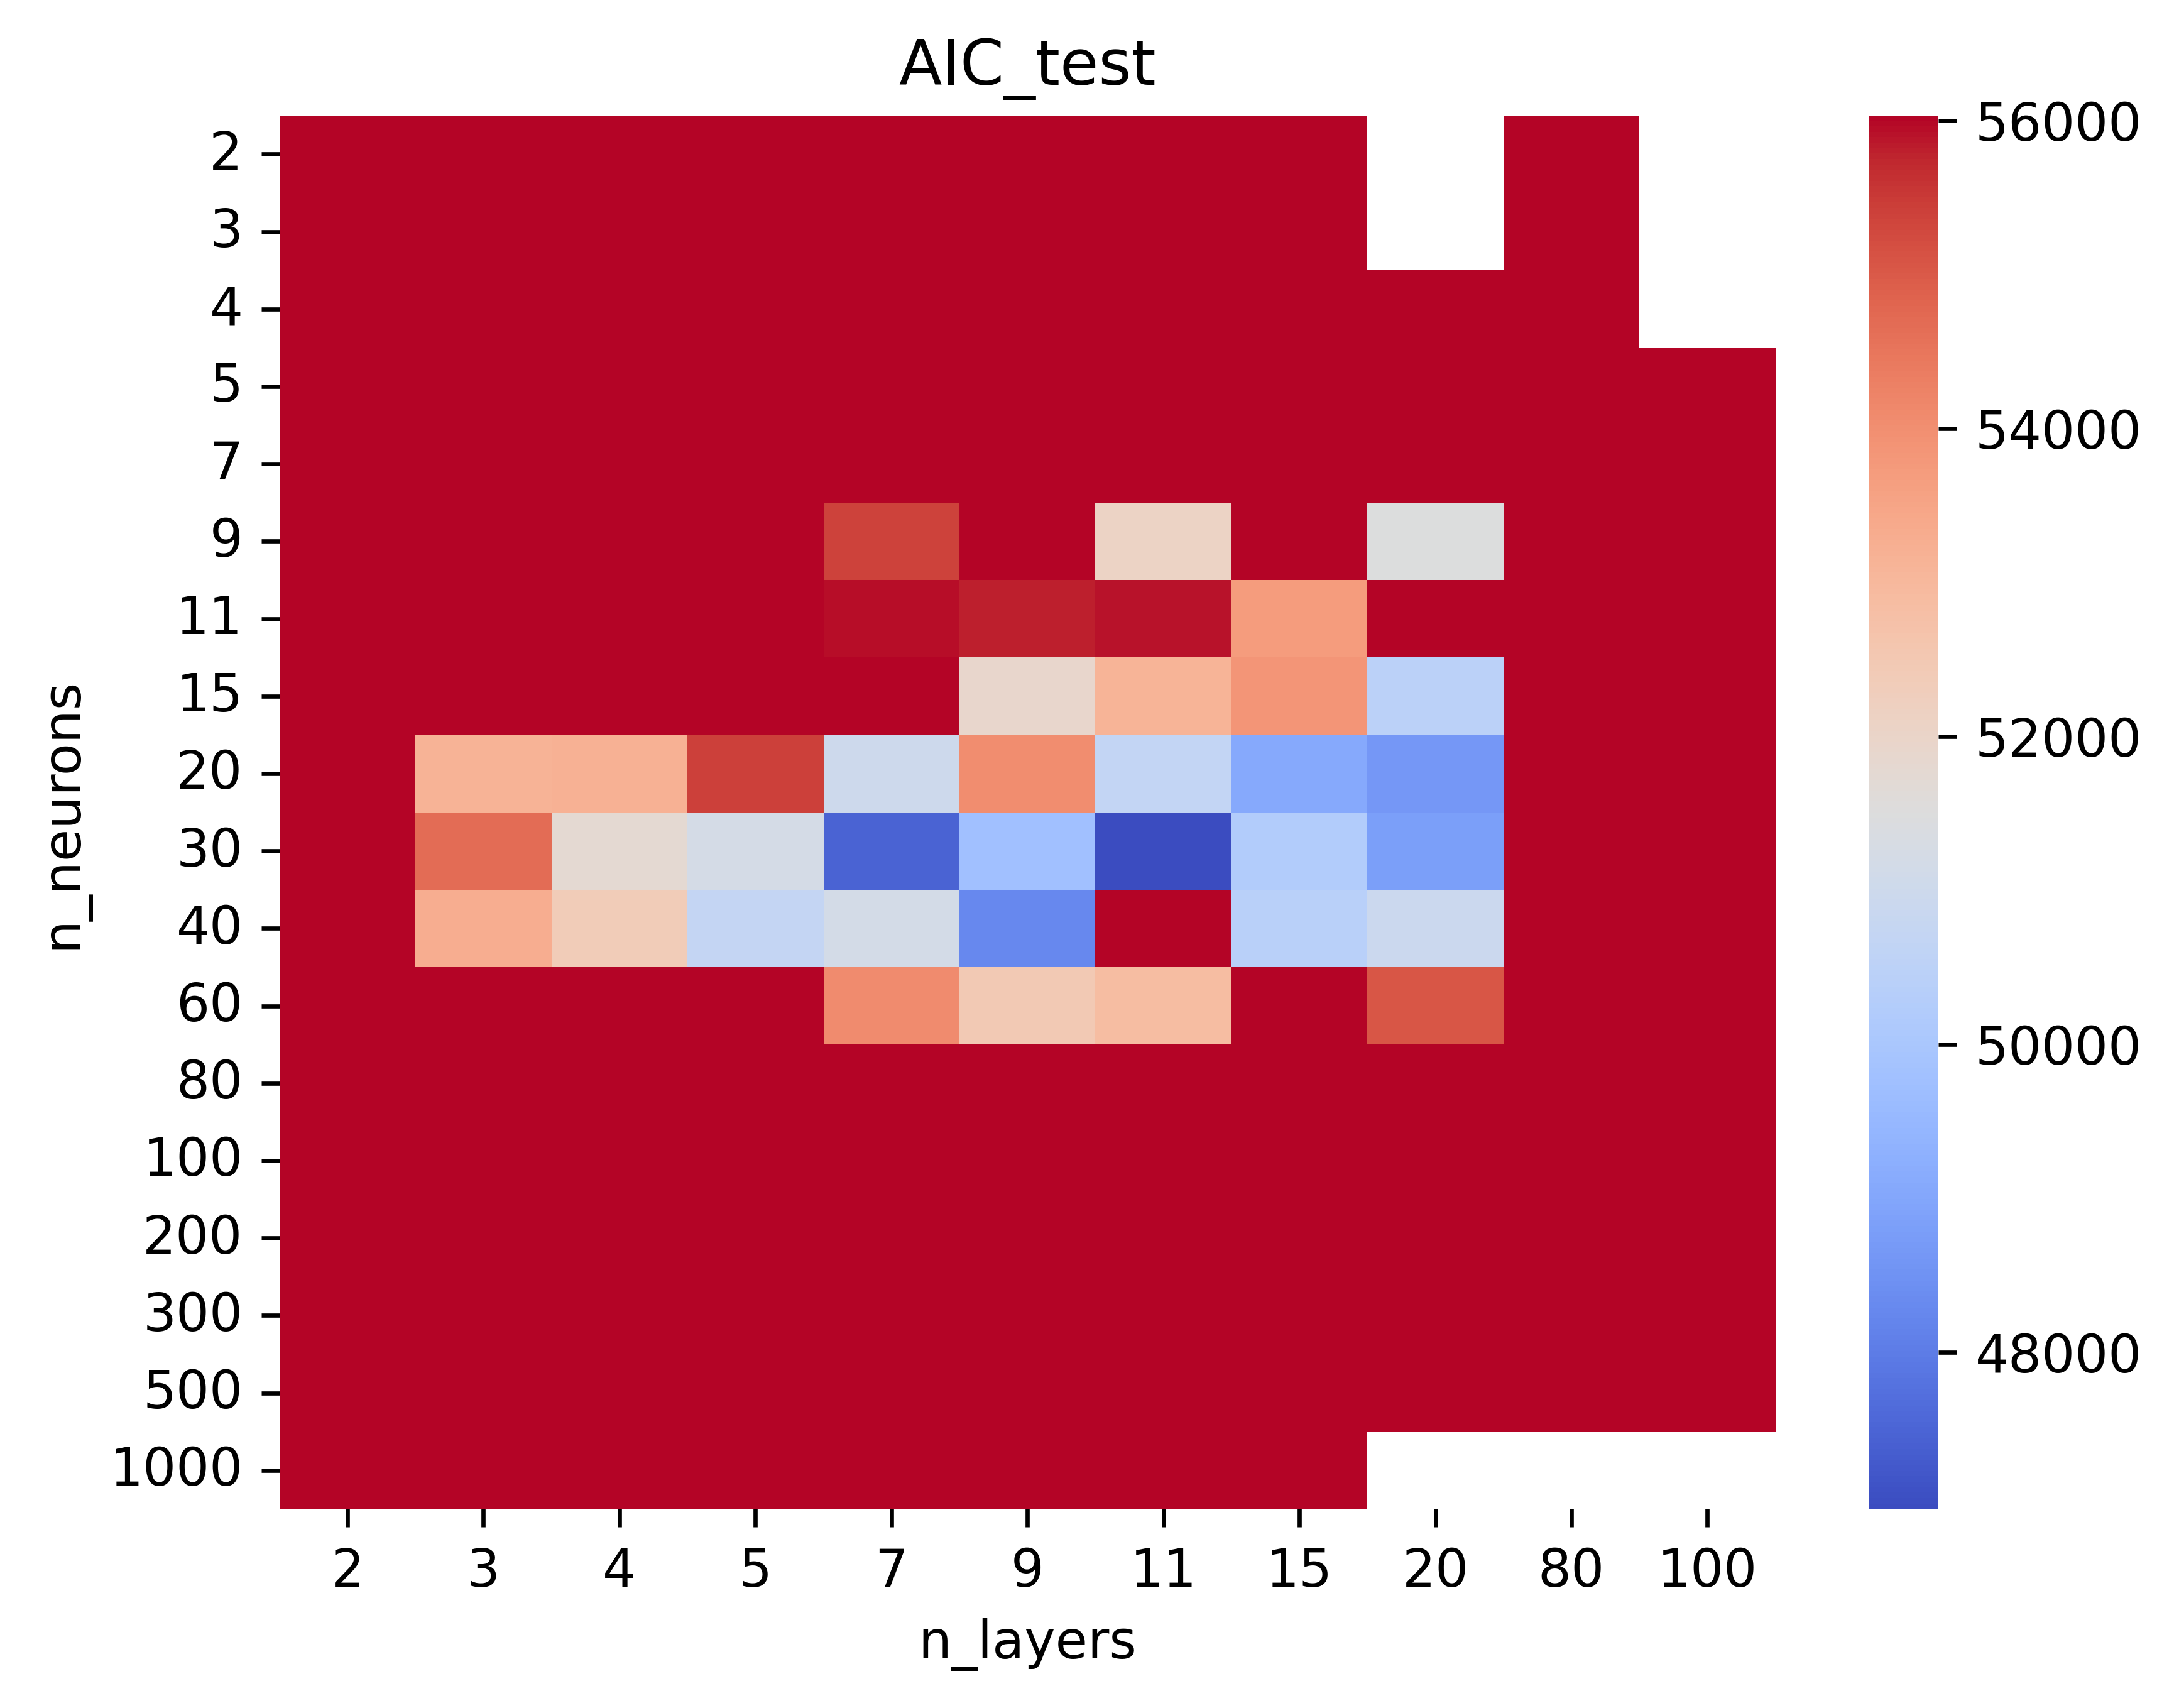

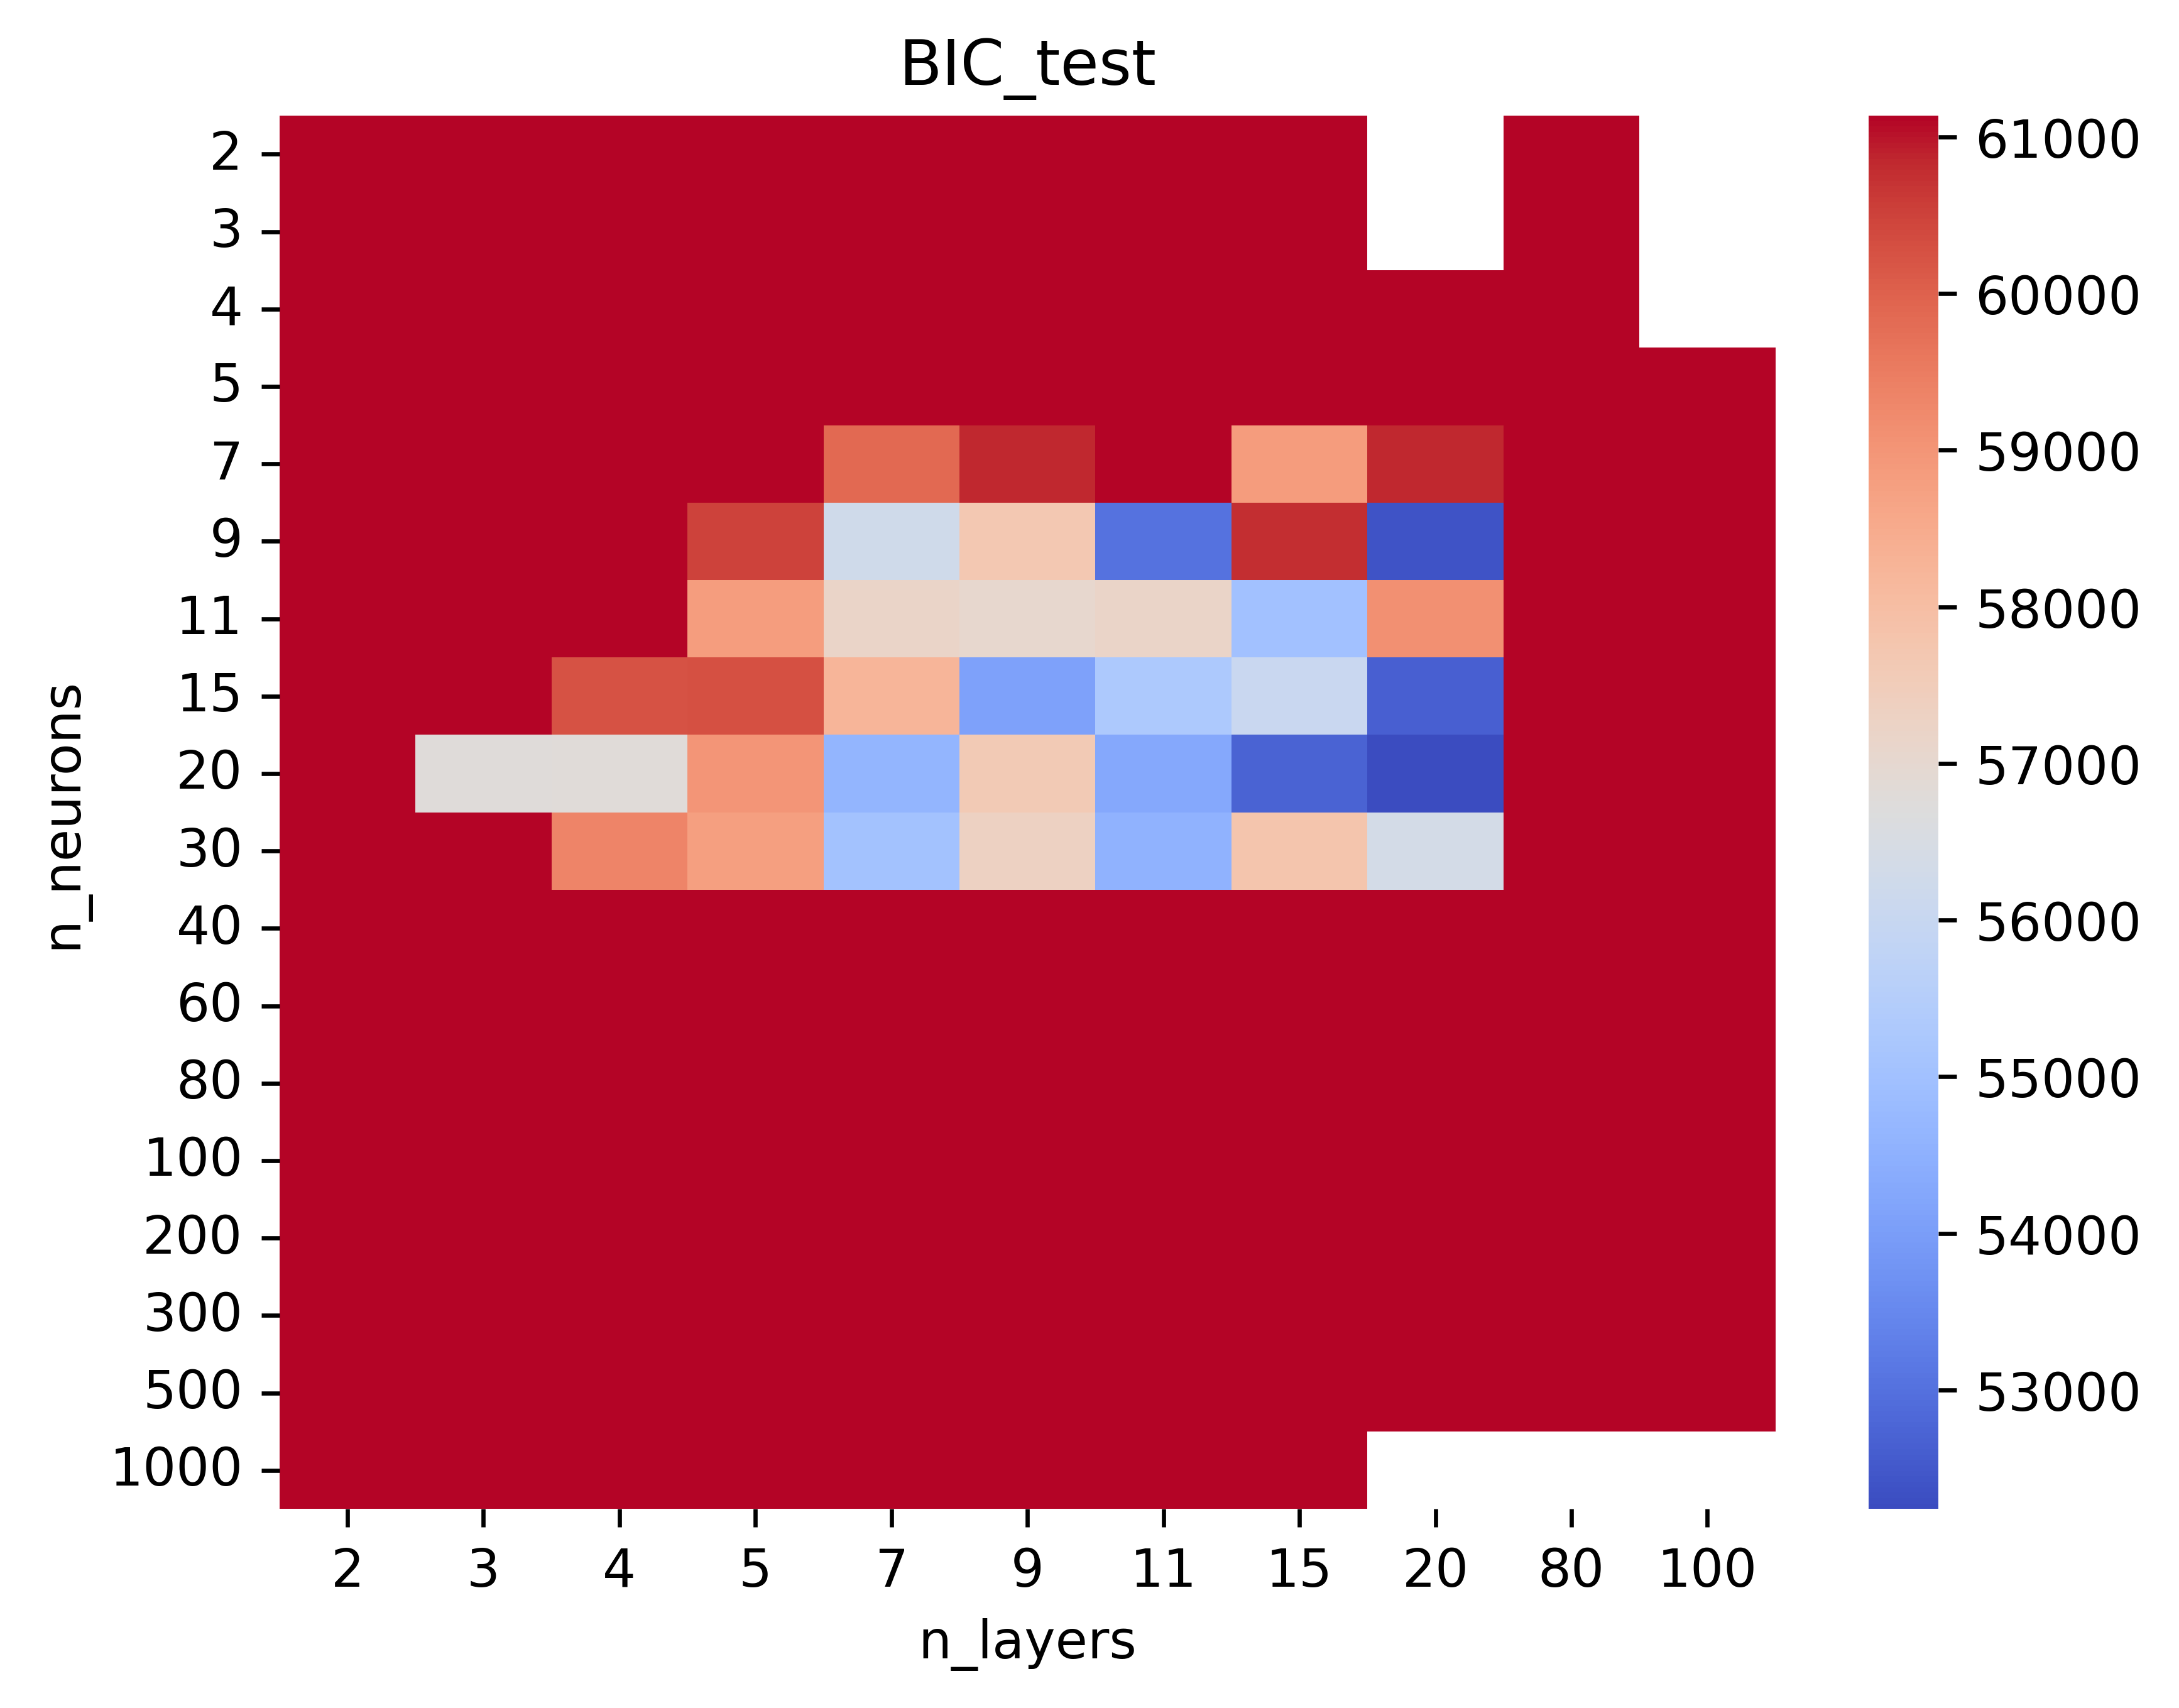

In [ ]:
to_plot_df = results_1_component.copy(deep=True).query('n_layers < 300')


for col in ['explained_variance_score_val', 'r2_score_val',
            'explained_variance_score_test', 'r2_score_test']:
    to_plot_df[col] = 1 - to_plot_df[col]
for col in ['explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test']:

    pivot_table = to_plot_df.pivot_table(values=col, index='n_neurons',
                                         columns=['n_layers'])
    # fig = plt.fi
    # Вычислите пороговое значение по качеству метрик
    threshold = np.nanpercentile(pivot_table.values, 20)
    plt.figure(dpi=600)
    sns.heatmap(pivot_table, annot=False, cmap='coolwarm', vmax=threshold)
    plt.title(col)
    plt.savefig(f'{path_import[:-4]}/pics/results_1_component_{col}.png', dpi=1000)
    plt.show()
